### PART 2: PREDICTION MODEL

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn import linear_model
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import f_regression

In [2]:
# DATA
path = 'D:/DataScience/DE/HW02/'
years = list(range(2011,2017))

states = pd.read_csv(path+'TrueData/TrueData2011.csv', sep = ';')['LocationDesc'][:55]

# GROUND TRUTH (crude prevalence)
GT = pd.DataFrame(index = states)
for y in years: 
    df = pd.read_csv(path+'TrueData/TrueData'+str(y)+'.csv', sep = ';')
    df = df.replace('*',np.nan)
    df['Data_Value'] = pd.to_numeric(df['Data_Value'])
    df = df.set_index('LocationDesc')
    GT[str(y)] = df['Data_Value'][df['Data_Value'].notnull()]
    
# GROUND TRUTH (age-adjusted prevalence)
GT2 = pd.DataFrame(index = states)
for y in years:
    df = pd.read_csv(path+'TrueData/TrueData2_'+str(y)+'.csv', sep = ';')
    df = df.replace('*',np.nan)
    df['Data_Value'] = pd.to_numeric(df['Data_Value'])
    df = df.set_index('LocationDesc')
    GT2[str(y)] = df['Data_Value'][df['Data_Value'].notnull()]

states = set(states).difference(['All States, DC and Territories (median) **', 'All States and DC (median) **', 
                                      'Guam', 'Puerto Rico'])
states = sorted(list(states))

categories = [0,45,419,429]
cat_names = ['all categories', 'health', 'health conditions', 'cancer']

In [3]:
GoogleTrends = {}

#take queries from file 
keywords = set(pd.read_excel(path+'GoogleTrends/QUERIES(new)_union.xlsx', sheetname = 0).columns).difference(['LocationDesc'])
keywords = list(keywords)

for kw in keywords:
    GoogleTrends[kw] = pd.DataFrame()
    
for year in range(len(years)):
    df = pd.read_excel(path+'GoogleTrends/QUERIES(new)_union.xlsx', sheetname = year)
    df = df.fillna(0)
    df = df.set_index('LocationDesc')


    for kw in keywords:
        GoogleTrends[kw][years[year]] = df[kw]
        
        
GoogleTrends2 = {}

keywords2 = set(pd.read_excel(path+'GoogleTrends/QUERIES(new)2_union.xlsx', sheetname = 0).columns).difference(['LocationDesc'])
keywords2 = list(keywords2)

for kw in keywords2:
    
    GoogleTrends2[kw] = pd.DataFrame()
    
for year in range(len(years)):
    
    df = pd.read_excel(path+'GoogleTrends/QUERIES(new)2_union.xlsx', sheetname = year)
    df = df.fillna(0)
    df = df.set_index('LocationDesc')
    #print(df.index)

    for kw in keywords2:
        
        GoogleTrends2[kw][years[year]] = df[kw]
        #dictionary of dataframes, one for each query as key 
        
#dataframe composed by states x years        
GoogleTrends['Carcinoma'].loc[states]

2011   2012   2013   2014   2015   2016
LocationDesc                                                  
Alabama                94.0   82.0  100.0   83.0   77.0   93.0
Alaska                 48.0   55.0   56.0   55.0   40.0   57.0
Arizona                68.0   68.0   67.0   67.0   61.0   76.0
Arkansas               68.0   80.0   86.0   80.0   69.0   75.0
California             48.0   49.0   53.0   51.0   43.0   55.0
Colorado               53.0   53.0   62.0   53.0   49.0   70.0
Connecticut            66.0   59.0   70.0   67.0   58.0   76.0
Delaware               60.0   51.0   71.0   71.0   61.0   72.0
District of Columbia   49.0   44.0   56.0   47.0   44.0   53.0
Florida                67.0   65.0   68.0   66.0   61.0   75.0
Georgia                60.0   51.0   58.0   55.0   47.0   68.0
Hawaii                 55.0   44.0   58.0   58.0   47.0   54.0
Idaho                  60.0   71.0   80.0   61.0   61.0   79.0
Illinois               58.0   58.0   61.0   59.0   51.0   69.0
Indiana                73.0   67.0   76.0   72.0   60.0   62.0
Iowa                   75.0   70.0   76.0   67.0   67.0   81.0
Kansas                 66.0   73.0   64.0   59.0   54.0   78.0
Kentucky               72.0   86.0   85.0   75.0   65.0  100.0
Louisiana              66.0   61.0   74.0   60.0   51.0   72.0
Maine                  87.0   70.0   78.0   85.0   70.0   64.0
Maryland               67.0   64.0   78.0   72.0   64.0   78.0
Massachusetts          71.0   68.0   72.0   80.0   65.0   77.0
Michigan               66.0   64.0   71.0   68.0   55.0   76.0
Minnesota              67.0   69.0   78.0   71.0   63.0   92.0
Mississippi            78.0   79.0   71.0   80.0   73.0   81.0
Missouri               65.0   76.0   75.0   73.0   67.0   83.0
Montana                72.0   62.0   97.0   59.0   54.0   63.0
Nebraska               65.0   73.0   84.0   87.0   59.0   82.0
Nevada                 43.0   38.0   46.0   50.0   41.0   48.0
New Hampshire          62.0   72.0   75.0   80.0   47.0   70.0
New Jersey             58.0   57.0   59.0   64.0   50.0   63.0
New Mexico             64.0   56.0   80.0   69.0   47.0   66.0
New York               52.0   55.0   60.0   58.0   48.0   63.0
North Carolina         71.0   65.0   70.0   72.0   55.0   73.0
North Dakota           84.0   88.0   44.0   65.0   58.0   54.0
Ohio                   73.0   67.0   74.0   79.0   64.0   78.0
Oklahoma               66.0   79.0   79.0   65.0   58.0   77.0
Oregon                 63.0   66.0   47.0   39.0   41.0   62.0
Pennsylvania           65.0   74.0   85.0   80.0   66.0   79.0
Rhode Island           71.0   70.0   76.0   66.0   52.0   60.0
South Carolina         72.0   76.0   72.0   65.0   56.0   64.0
South Dakota          100.0   94.0   95.0  100.0   77.0   78.0
Tennessee              90.0   90.0   94.0   93.0   75.0   90.0
Texas                  55.0   52.0   58.0   54.0   46.0   58.0
Utah                   57.0   53.0   61.0   53.0   44.0   67.0
Vermont                62.0   70.0   63.0   86.0   46.0   76.0
Virginia               57.0   59.0   61.0   46.0   33.0   65.0
Washington             56.0   55.0   54.0   54.0   45.0   64.0
West Virginia          88.0  100.0   83.0   88.0  100.0   99.0
Wisconsin              76.0   64.0   78.0   72.0   61.0   69.0
Wyoming                47.0   48.0   69.0   46.0   40.0   52.0

In [4]:
def lr_function(X_train, X_test, Y_train, Y_test):
    
    
    lr = linear_model.LinearRegression()
    # Train the model using the training sets
    lr.fit(X_train, Y_train.values.ravel())
    # Make predictions using the testing set
    Y_pred = lr.predict(X_test)
    e = Y_pred-Y_test.values.ravel()
    coefs = lr.coef_
    
    return((mean_squared_error(Y_test, Y_pred),r2_score(Y_test,Y_pred), e, coefs))    

In [5]:
def lasso_function(X_train, X_test, Y_train, Y_test):
    
    alphas = list(np.arange(0.001,0.1,0.001))
    lassocv = LassoCV(alphas=alphas, cv=10, max_iter=10000, normalize=True)
    
    lassocv.fit(X_train, Y_train.values.ravel())
    lasso = Lasso(max_iter=10000, normalize=True)
    lasso.set_params(alpha=lassocv.alpha_)
    #print(lassocv.alpha_)
    lasso.fit(X_train,Y_train.values.ravel())
    Y_pred = lasso.predict(X_test)
    e = Y_pred-Y_test.values.ravel()
    coefs = lasso.coef_
    return((mean_squared_error(Y_test, Y_pred),r2_score(Y_test,Y_pred),e,coefs))  

In [6]:
def ridge_function(X_train, X_test, Y_train, Y_test):
    
    #alphas = 10**np.linspace(100,-10,100)*0.5
    alphas = np.linspace(.0001,.1,1000)
    ridgecv = RidgeCV(alphas=alphas, scoring='r2', normalize=True)
    
    ridgecv.fit(X_train, Y_train.values.ravel())
    print(ridgecv.alpha_)
    ridge = Ridge(alpha=ridgecv.alpha_, normalize=True)
    ridge.fit(X_train, Y_train.values.ravel())
    Y_pred = ridge.predict(X_test)
    e = Y_pred-Y_test.values.ravel()
    return((mean_squared_error(Y_test, Y_pred),r2_score(Y_test,Y_pred),e))  

In [7]:
nc = (0,.4,.5,1) #define a color 

##  2.1 - Set up a regression model that predicts your chosen ground truth indicator(s) on the basis of  Google Trends data for several keywords. Discuss the strategy you use for selecting additional keywords and for selecting which ones you include in the model. Select the model via temporal and spatial cross-validation, and discuss its generalizability across states and years on the basis of your results.

#### The queries selection has been performed in differents steps. The correlation analysis helped to reduce the original number of queries to consider just proxy data sufficiently correlated with GT target. At the beginning we decided to apply 2 different linear regression models, Ridge and Lasso to select the weights for each query, but the results in terms of prediction were equal to use a simple linear regression with F-test , since some predictors were completely trascurated. Therefore we used the linear regression model implementing an F- test to select the best predictors (queries) for our model. 



## CRUDE PREVALENCE

In [8]:
results = pd.DataFrame(index = ['MSE','R2'])  #create a table to  compare different models

### temporal cross-validation

#### We take in the train dataset all the data over the years, excluding the year considered to test. For each year, we keep the residuals for each predicted state value and then we compute the mean square error and coefficient of determination (R2) adjusted and evaluate the mean of each step in the cross-validation.

In [9]:
#Script(3)
# crude prevalence data
e = pd.DataFrame(index = states)
r2_model = []
MSE_model = []
columns = []
for year in range(len(years)):
    
    yys = set(range(len(years))).difference([year])
    X_train = []
    y_train = []
    
    for yy in yys:
        
        x = []
        for kw in keywords:
            x += [GoogleTrends[kw].loc[states,years[yy]]]
        x = pd.concat(x, axis = 1)
        X_train += [pd.DataFrame(x.values, columns = keywords, index = states)]
        
        y_train += [GT.loc[states,str(years[yy])]]
        
    
    # TRAIN
    X_train = pd.concat(X_train, axis = 0)
    X_train = (X_train-X_train.mean())/X_train.std()
    y_train = pd.concat(y_train, axis = 0)
    #print(X_train.shape)
    #print(y_train.shape)
    
    # TEST
    
    x = []
    for kw in keywords:
        x += [GoogleTrends[kw].loc[states,years[year]]]
        
    x = pd.concat(x, axis = 1)
    
    X_test = pd.DataFrame(x.values, columns = keywords, index = states)
    X_test = (X_test-X_test.mean())/X_test.std()
    
    
    y_test = GT.loc[states,str(years[year])]
    #print(X_test.shape)
    #print(y_test.shape)
    #print(X_train.iloc[:5,:5])
    
    f,p = f_regression(X_train, y_train.values.ravel())
    cols = X_train.columns[p<10**(-2)]  #threshold for the f-test p-value 
    print('Features: ', *list(cols))
    columns += list(cols)
    
    model = lr_function(X_train[cols], X_test[cols], y_train, y_test)
    
    r2_model += [model[1]]
    MSE_model += [model[0]]
    e[str(years[year])] = model[2]
    
    print(years[year])
    print('MSE',MSE_model[-1])
    print('r2',r2_model[-1])
    
print()
print('MSE',np.mean(MSE_model))
print('r2',np.mean(r2_model))

e['mean squared error'] = np.mean(e**2, axis = 1)
e = e.sort_values('mean squared error')
results['by years'] = [np.mean(MSE_model), np.mean(r2_model)]

Features:  Prognosis Dermatology.1 Contact dermatitis Prednisone Onychomycosis Cellulitis Abscess Australia Carcinoma Prednisone.1 Skin cancer Dermatology Melanoma Food and Drug Administration
2011
MSE 0.854668104376
r2 0.286464361769
Features:  Prognosis Dermatology.1 Prednisone Onychomycosis Cellulitis Abscess Australia Carcinoma Prednisone.1 Skin cancer Dermatology Melanoma Food and Drug Administration
2012
MSE 1.10928330383
r2 0.224946308733
Features:  Prognosis Dermatology.1 Contact dermatitis Prednisone Onychomycosis Cellulitis Abscess Australia Carcinoma Prednisone.1 Gene Skin cancer Dermatology Melanoma Food and Drug Administration
2013
MSE 0.965946891785
r2 0.3552917974
Features:  Prognosis Dermatology.1 Contact dermatitis Prednisone Onychomycosis Cellulitis Abscess Australia Carcinoma Prednisone.1 Gene Skin cancer Dermatology Melanoma Food and Drug Administration
2014
MSE 1.04031516363
r2 0.28229958766
Features:  Prognosis Dermatology.1 Contact dermatitis Prednisone Onychomyc

#### We showed the queries used as predictors for each year and the related  MSE and r2. 

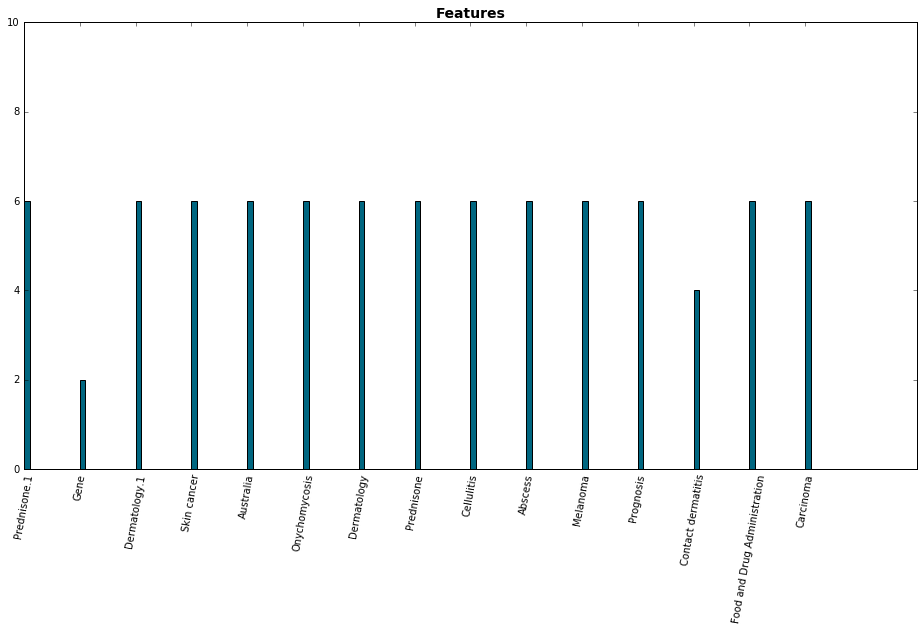

In [10]:
count = Counter(columns)
plt.figure(figsize=(16, 8))
plt.bar(np.arange(len(count)), count.values(), .1, color = nc)
plt.xticks(np.arange(len(count)),count.keys(), rotation=80)
plt.ylim(0,10)
plt.title('Features', fontsize=14, fontweight='bold')
plt.show()

#### The last plot shows how many times a query has been used for training a model as a predictor. 

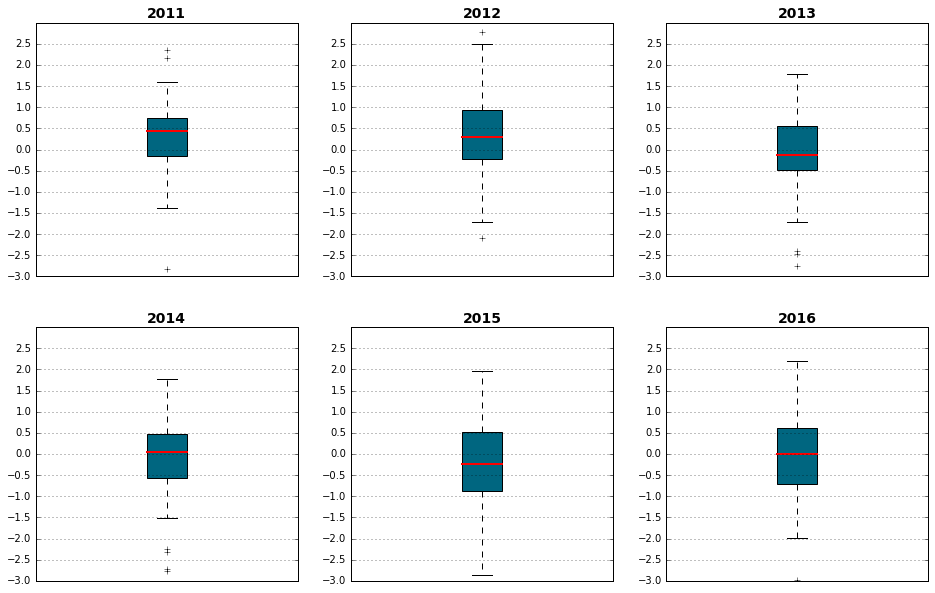

In [11]:
plt.figure(figsize=(16, 10))

for y in range(len(years)):
    plt.subplot(231+y)
    bp = plt.boxplot(e.loc[:,str(years[y])], patch_artist = True)
    plt.setp(bp['boxes'], color='black')
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['medians'], color='red', linewidth = 2)
    plt.setp(bp['fliers'], color='black')
    plt.setp(bp['caps'], color='black')
    bp['boxes'][0].set_facecolor(nc)
    plt.title(str(years[y]), fontsize=14, fontweight='bold')
    plt.ylim(-3,3)
    plt.yticks(np.arange(-3,3,.5))
    plt.xticks([])
    plt.grid()
plt.show()

#### The boxplots show the MSE distribution over the states for each year obtained with script(3).

In [12]:
print("Best predicted states, linear regression with F-test:")
print("")
e.head()  

Best predicted states, linear regression with F-test:



2011      2012      2013      2014      2015      2016  \
Michigan     0.096666 -0.132490  0.249717  0.041601 -0.247996  0.049718   
Oklahoma    -0.178017  0.092808 -0.521325  0.210735  0.399183 -0.253214   
Mississippi  0.449331 -0.062799 -0.205389  0.358435 -0.368309  0.397668   
California  -0.880117 -0.245342  0.038438  0.078304 -0.028706 -0.130832   
Georgia      0.064450  0.304803  0.608873 -0.541681 -0.272135  0.258821   

             mean squared error  
Michigan               0.025827  
Oklahoma               0.096660  
Mississippi            0.111716  
California             0.143391  
Georgia                0.150375

In [13]:
print("Worst predicted states, linear regression with F-test:")
print("")
e.tail() 

Worst predicted states, linear regression with F-test:



2011      2012      2013      2014      2015  \
District of Columbia  1.362679  2.773838  1.769855  0.948649  1.782840   
Alaska                2.168269  2.505801  0.547886  1.777067  1.954896   
Wyoming              -1.382897 -1.701804 -2.394416 -2.320249 -2.066030   
Oregon               -0.867974 -0.500291 -2.467486 -2.767836 -2.771108   
Florida              -2.825921 -2.093441 -2.762109 -2.731201 -2.860113   

                          2016  mean squared error  
District of Columbia  1.732050            3.293652  
Alaska                2.197114            3.847917  
Wyoming              -1.989045            4.025017  
Oregon               -1.956695            4.376794  
Florida              -2.979779            7.419393

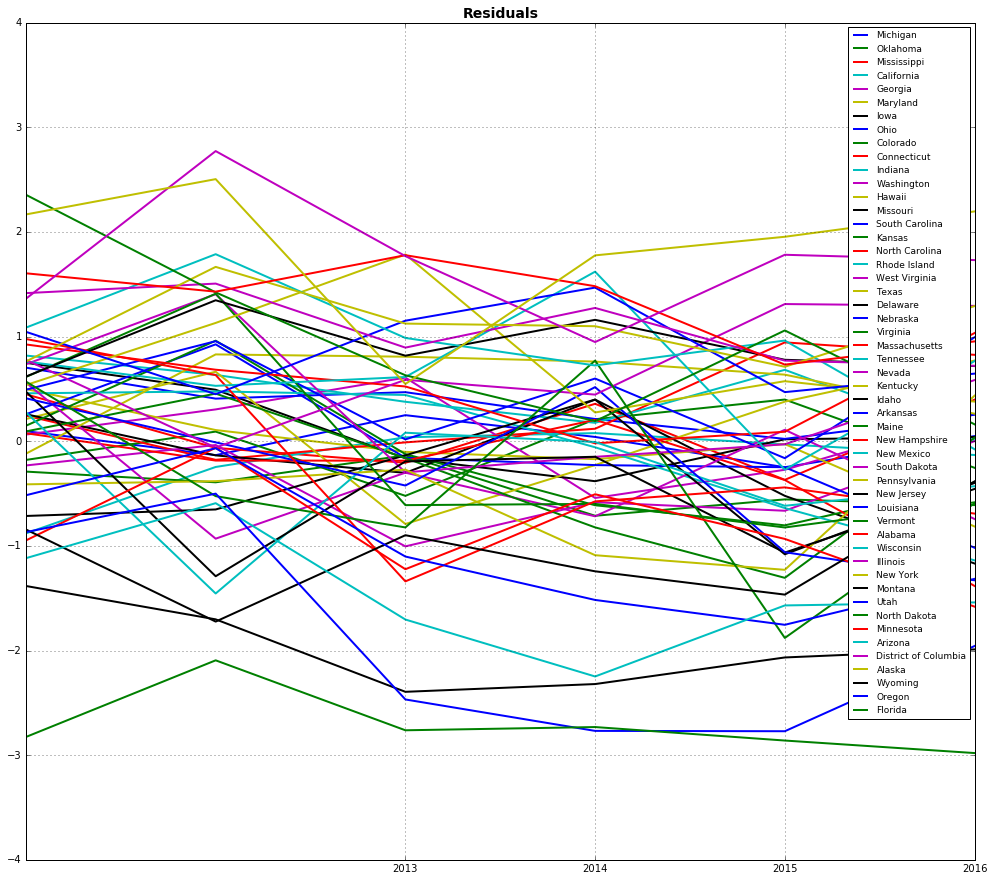

In [14]:
plt.figure(figsize=(17, 15))
plt.plot(e.iloc[:,:-1].T, linewidth = 2)
plt.title('Residuals',fontsize=14, fontweight='bold')
plt.legend(e.index, prop={'size': 9})
plt.xticks(years[2:],years[2:])
plt.ylim(-4,4)
plt.grid()
plt.show()

### Spatial cross-validation

#### In this case we are considering all data, excluding each time a different state.

In [15]:
# crude prevalence data

e = pd.DataFrame(index = years)
r2_model = []
MSE_model = []
columns = []

for state in states:
    
    print(state)
    #take all states less the one considered
    s = set(states).difference([state])
    X_train = []
    y_train = []
    
    for ostate in s:
        
        x = []
        y_train += [GT.loc[ostate]]
        keywords = list(keywords)
        
        for kw in keywords:
            
            x += [GoogleTrends[kw].loc[ostate]]
        x = pd.concat(x, axis = 1)
        
        
        X_train += [pd.DataFrame(x.values, columns = keywords)]
        
    # TRAIN
    X_train = pd.concat(X_train, axis = 0)
    X_train = (X_train-X_train.mean())/X_train.std()
    
    y_train = pd.concat(y_train, axis = 0)
 
    
    # TEST  
    
    X_test = []
    
    for kw in keywords:
        
        X_test += [GoogleTrends[kw].loc[state]]
    
    X_test = pd.concat(X_test, axis = 1)
    X_test = pd.DataFrame(X_test.values, columns = keywords)
    X_test = (X_test-X_test.mean())/X_test.std()
    X_test = X_test.fillna(0)
    
    y_test = GT.loc[state]

    
    #apply the f_regression
    f,p = f_regression(X_train, y_train.values.ravel())
    cols = X_train.columns[p<10**(-6)]
    print('Features: ', *list(cols))
    columns += list(cols)
    
    
    model = lr_function(X_train[cols], X_test[cols], y_train, y_test)
    #save the results of the model
    r2_model += [model[1]]
    MSE_model += [model[0]]
    e[state] = model[2]
    
    print('MSE',MSE_model[-1])
    print('r2',r2_model[-1])
    
print()
print('MSE',np.mean(MSE_model))
print('r2',np.mean(r2_model))
e = e.T
e['mean squared error'] = np.mean(e**2, axis = 1)
e = e.sort_values('mean squared error')
results['by states'] = [np.mean(MSE_model), np.mean(r2_model)]

Alabama
Features:  Dermatology.1 Australia Carcinoma Skin cancer Dermatology Melanoma
MSE 5.25926670064
r2 -106.575909786
Alaska
Features:  Carcinoma Skin cancer Melanoma
MSE 9.5046697032
r2 -366.922698188
Arizona
Features:  Dermatology.1 Australia Carcinoma Skin cancer Dermatology Melanoma
MSE 3.76323961568
r2 -12.824145527
Arkansas
Features:  Dermatology.1 Australia Carcinoma Skin cancer Dermatology Melanoma
MSE 1.02398189446
r2 -3.1142129688
California
Features:  Dermatology.1 Australia Carcinoma Skin cancer Dermatology Melanoma
MSE 1.30867999485
r2 -12.6954883182
Colorado
Features:  Dermatology.1 Australia Carcinoma Skin cancer Dermatology Melanoma
MSE 0.39017454481
r2 -9.64112394938
Connecticut
Features:  Dermatology.1 Australia Carcinoma Skin cancer Dermatology Melanoma
MSE 0.55323028096
r2 -47.5763173526
Delaware
Features:  Dermatology.1 Australia Carcinoma Skin cancer Dermatology Melanoma
MSE 0.964246901497
r2 -8.83367944869
District of Columbia
Features:  Dermatology.1 Austral

#### The model setted up above, with the spatial cross-validation, has a really high MSE and a negative coefficient of determination that's not good as result,  even if we're calculating the one that's adjusted and it can be negative. We couldn't find a regression model with good result, when we deal with spatial cross-validation. In fact all the models we tried with this kind of cross-validation have a negative coefficient of determination and a MSE  is over one, both taking on average. 

#### The following plot shows how many  times a query has been considered as predictors in the model performed before with spatial cross-validation.

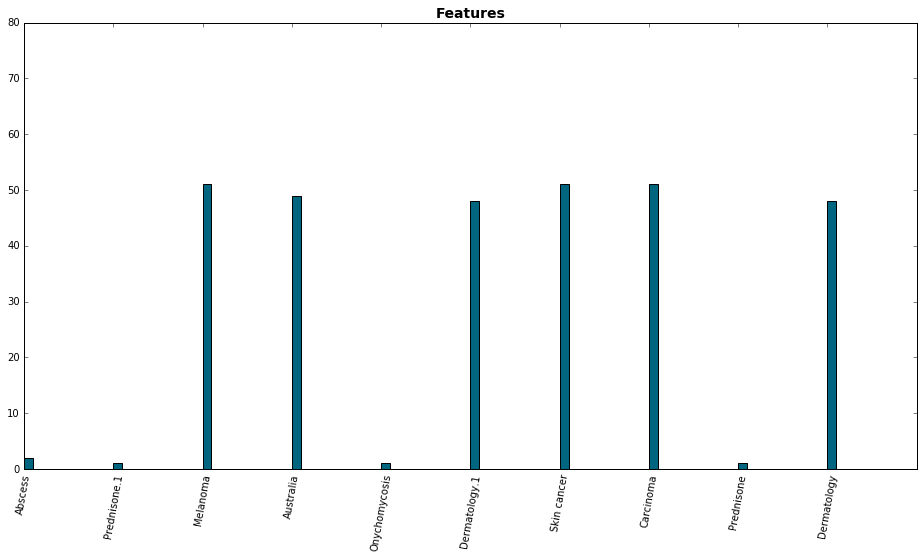

In [16]:
count = Counter(columns)
plt.figure(figsize=(16, 8))
plt.bar(np.arange(len(count)), count.values(), .1, color = nc)
plt.xticks(np.arange(len(count)),count.keys(), rotation=80)
plt.ylim(0,80)
plt.title('Features', fontsize=14, fontweight='bold')
plt.show()

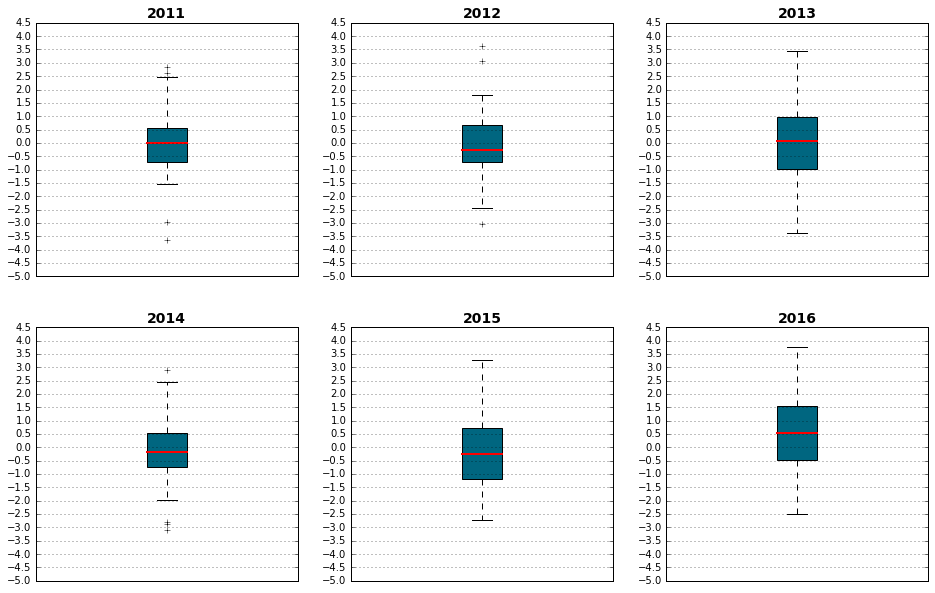

In [17]:
plt.figure(figsize=(16, 10))

for y in range(len(years)):
    plt.subplot(231+y)
    bp = plt.boxplot(e.T.loc[years[y],:], patch_artist = True)
    plt.setp(bp['boxes'], color='black')
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['medians'], color='red', linewidth = 2)
    plt.setp(bp['fliers'], color='black')
    plt.setp(bp['caps'], color='black')
    bp['boxes'][0].set_facecolor(nc)
    plt.title(str(years[y]), fontsize=14, fontweight='bold')
    plt.ylim(-3,3)
    plt.yticks(np.arange(-5,5,.5))
    plt.xticks([])
    plt.grid()
plt.show()

In [18]:
print("Best predicted states, linear regression with F-test:")
print("")
e.head()  

Best predicted states, linear regression with F-test:



2011      2012      2013      2014      2015      2016  \
South Dakota -0.209030 -0.505944  0.060173 -0.647459  0.106596  0.075665   
Rhode Island -0.719343  0.292602 -0.154495 -0.136541 -0.453397 -0.560825   
Iowa          0.012636 -0.195653  0.206100 -0.477550 -0.306000  0.966467   
Oklahoma     -0.595131 -0.708064  0.385990  0.545949  0.705133  0.280124   
Ohio          0.123130 -0.348454  0.614406 -0.018690  0.323546  1.144062   

              mean squared error  
South Dakota            0.123264  
Rhode Island            0.194279  
Iowa                    0.222777  
Oklahoma                0.313044  
Ohio                    0.321331

In [19]:
print("Worst predicted states, linear regression with F-test:")
print("") 

e.tail()

Worst predicted states, linear regression with F-test:



2011      2012      2013      2014      2015  \
Arizona              -1.519366 -1.737949 -2.310517 -2.857452 -1.597352   
Alabama              -2.965936 -2.447192 -2.333747 -1.911660 -1.806229   
Alaska                2.848792  3.071746  2.559202  2.880458  3.258404   
Florida              -3.641900 -3.026933 -3.381754 -3.094166 -2.719588   
District of Columbia  2.629824  3.613877  3.452287  2.457541  2.788040   

                          2016  mean squared error  
Arizona              -1.093365            3.763240  
Alabama              -2.099236            5.259267  
Alaska                3.743398            9.504670  
Florida              -2.493658            9.508396  
District of Columbia  3.726432            9.932222

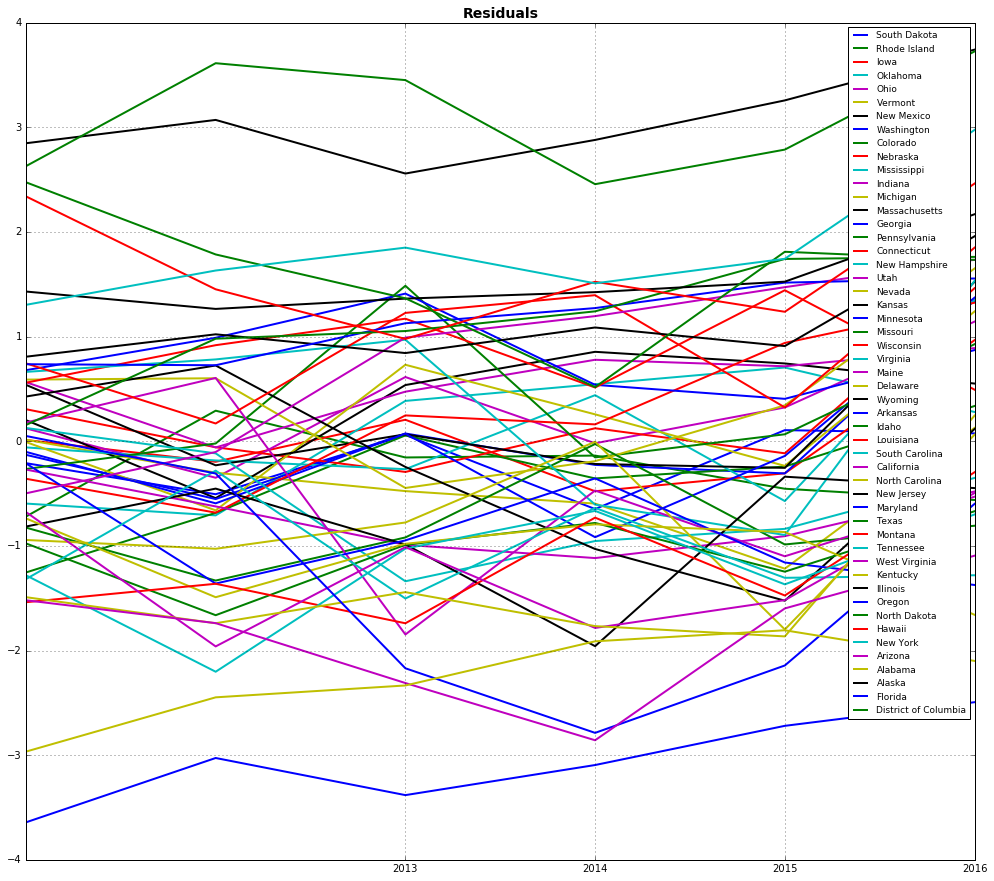

In [20]:
plt.figure(figsize=(17, 15))
plt.plot(e.iloc[:,:-1].T, linewidth = 2)
plt.title('Residuals',fontsize=14, fontweight='bold')
plt.legend(e.index, prop={'size': 9})
plt.xticks(years[2:],years[2:])
plt.ylim(-4,4)
plt.grid()
plt.show()

## AGE ADJUSTED

#### Same models have been apply to "age adjusted data" as a new prediction target. Every step made before, from data selection to model setting up, has been executed again.

In [21]:
results2 = pd.DataFrame(index = ['MSE','R2'])  #save results

### temporal cross-validation

In [22]:
# age adjusted data
e = pd.DataFrame(index = states)
r2_model = []
MSE_model = []
columns = []
for year in range(len(years)):
    yys = set(range(len(years))).difference([year])
    X_train = []
    y_train = []
    for yy in yys:
        x = []
        for kw in keywords2:
            x += [GoogleTrends2[kw].loc[states,years[yy]]]
        x = pd.concat(x, axis = 1)
        X_train += [pd.DataFrame(x.values, columns = keywords2, index = states)]
        
        y_train += [GT2.loc[states,str(years[yy])]]
        
    
    # TRAIN
    X_train = pd.concat(X_train, axis = 0)
    X_train = (X_train-X_train.mean())/X_train.std()
    y_train = pd.concat(y_train, axis = 0)
    #print(X_train.shape)
    #print(y_train.shape)
    
    # TEST
    
    x = []
    for kw in keywords2:
        x += [GoogleTrends2[kw].loc[states,years[year]]]
        
    x = pd.concat(x, axis = 1)
    
    X_test = pd.DataFrame(x.values, columns = keywords2, index = states)
    X_test = (X_test-X_test.mean())/X_test.std()
    
    
    y_test = GT2.loc[states,str(years[year])]
    #print(X_test.shape)
    #print(y_test.shape)
    #print(X_train.iloc[:5,:5])
    
    f,p = f_regression(X_train, y_train.values.ravel())
    cols = X_train.columns[p<10**(-1)]
    print('Features: ', *list(cols))
    columns += list(cols)
    
    model = lr_function(X_train[cols], X_test[cols], y_train, y_test)
    
    r2_model += [model[1]]
    MSE_model += [model[0]]
    e[str(years[year])] = model[2]
    
    print(years[year])
    print('MSE',MSE_model[-1])
    print('r2',r2_model[-1])
    
print()
print('MSE',np.mean(MSE_model))
print('r2',np.mean(r2_model))
e['mean squared error'] = np.mean(e**2, axis = 1)
e = e.sort_values('mean squared error')
results2['by years'] = [np.mean(MSE_model), np.mean(r2_model)]

Features:  Latin America Skin cancer Prednisone Dermatology Cellulitis Abscess Melanoma Australia Food and Drug Administration Carcinoma
2011
MSE 0.6993194173
r2 0.247237638578
Features:  Latin America Skin cancer Prednisone Dermatology Abscess Melanoma Australia Food and Drug Administration Carcinoma
2012
MSE 0.811803435185
r2 0.241122507577
Features:  Latin America Skin cancer Prednisone Dermatology Cellulitis Abscess Melanoma Australia Food and Drug Administration Carcinoma
2013
MSE 0.716581087656
r2 0.32167725407
Features:  Latin America Skin cancer Prednisone Dermatology Cellulitis Abscess Melanoma Australia Food and Drug Administration Carcinoma
2014
MSE 0.649758195858
r2 0.320692857546
Features:  Latin America Skin cancer Prednisone Dermatology Abscess Melanoma Australia Food and Drug Administration Carcinoma
2015
MSE 0.626785186468
r2 0.333752249748
Features:  Latin America Skin cancer Prednisone Dermatology Abscess Melanoma Australia Food and Drug Administration Carcinoma
2016

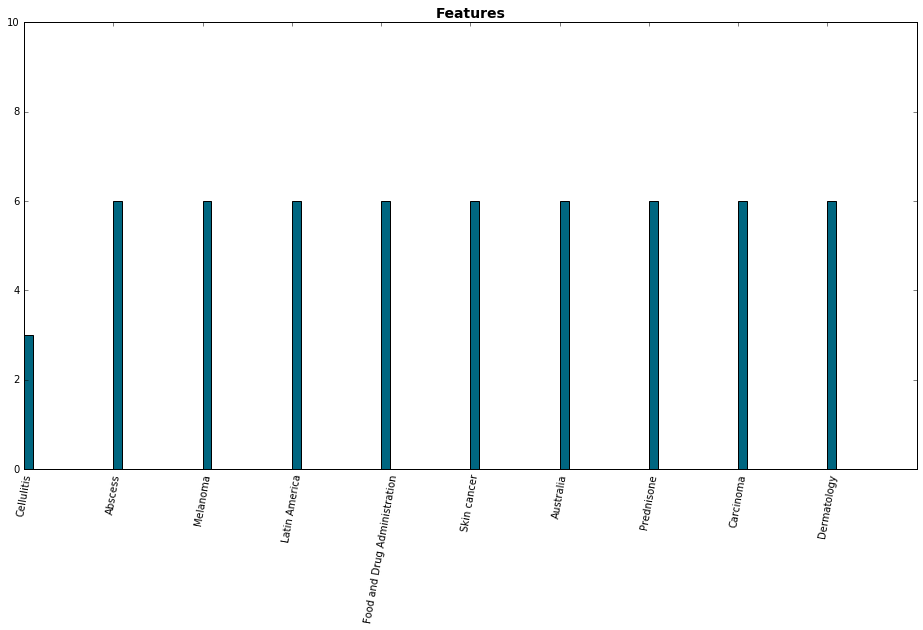

In [23]:
# quante volte una variabile appare in un modello
count = Counter(columns)
plt.figure(figsize=(16, 8))
plt.bar(np.arange(len(count)), count.values(), .1, color = nc)
plt.xticks(np.arange(len(count)),count.keys(), rotation=80)
plt.ylim(0,10)
plt.title('Features', fontsize=14, fontweight='bold')
plt.show()

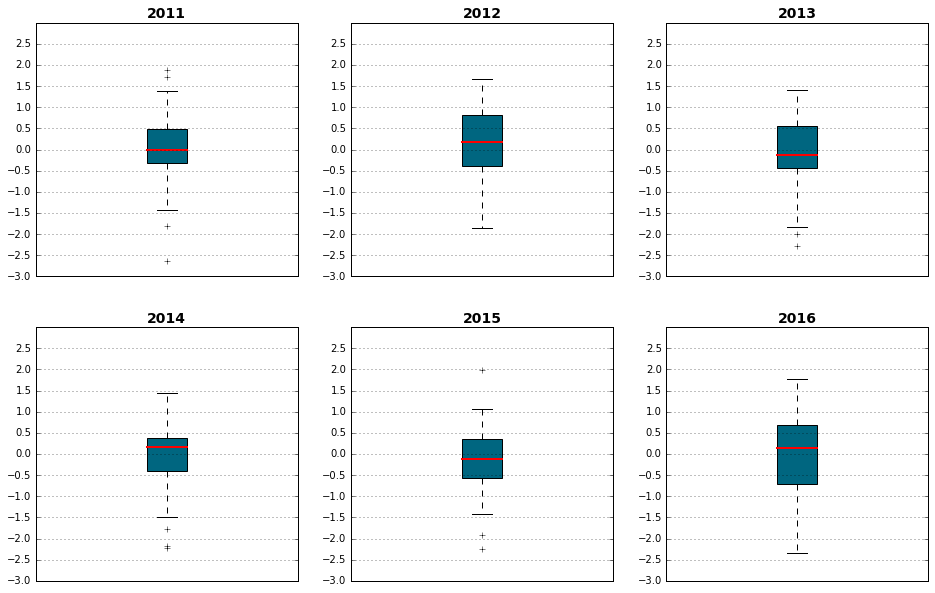

In [24]:
plt.figure(figsize=(16, 10))

for y in range(len(years)):
    plt.subplot(231+y)
    bp = plt.boxplot(e.loc[:,str(years[y])], patch_artist = True)
    plt.setp(bp['boxes'], color='black')
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['medians'], color='red', linewidth = 2)
    plt.setp(bp['fliers'], color='black')
    plt.setp(bp['caps'], color='black')
    bp['boxes'][0].set_facecolor(nc)
    plt.title(str(years[y]), fontsize=14, fontweight='bold')
    plt.ylim(-3,3)
    plt.yticks(np.arange(-3,3,.5))
    plt.xticks([])
    plt.grid()
plt.show()

In [25]:
e.head()

2011      2012      2013      2014      2015      2016  \
Virginia      -0.162909  0.098556 -0.082100 -0.299698 -0.433246  0.110196   
Oklahoma       0.265217  0.221085 -0.182044  0.167599  0.462783 -0.003865   
Washington    -0.297278 -0.116125 -0.411678  0.131345 -0.076374  0.344965   
Vermont        0.329722 -0.412979 -0.455752  0.146779 -0.146549 -0.074616   
West Virginia  0.360632 -0.122829 -0.358704 -0.211787 -0.454018 -0.313501   

               mean squared error  
Virginia                 0.055443  
Oklahoma                 0.065772  
Washington               0.068904  
Vermont                  0.089261  
West Virginia            0.103847

In [26]:
e.tail()

2011      2012      2013      2014      2015      2016  \
Oregon  -0.971078 -0.729821 -1.745459 -1.339601 -1.377788 -1.030743   
Alaska   1.728627  1.659456  1.120748  1.448225  1.984970  1.765027   
Wyoming -1.807193 -1.793067 -1.839405 -2.224807 -1.429197 -1.228227   
Utah    -1.425908 -1.226199 -1.984555 -2.166253 -2.255448 -2.025291   
Florida -2.645328 -1.851493 -2.289742 -1.763560 -1.920253 -2.353484   

         mean squared error  
Oregon             1.546253  
Alaska             2.691801  
Wyoming            3.060893  
Utah               3.559456  
Florida            4.667518

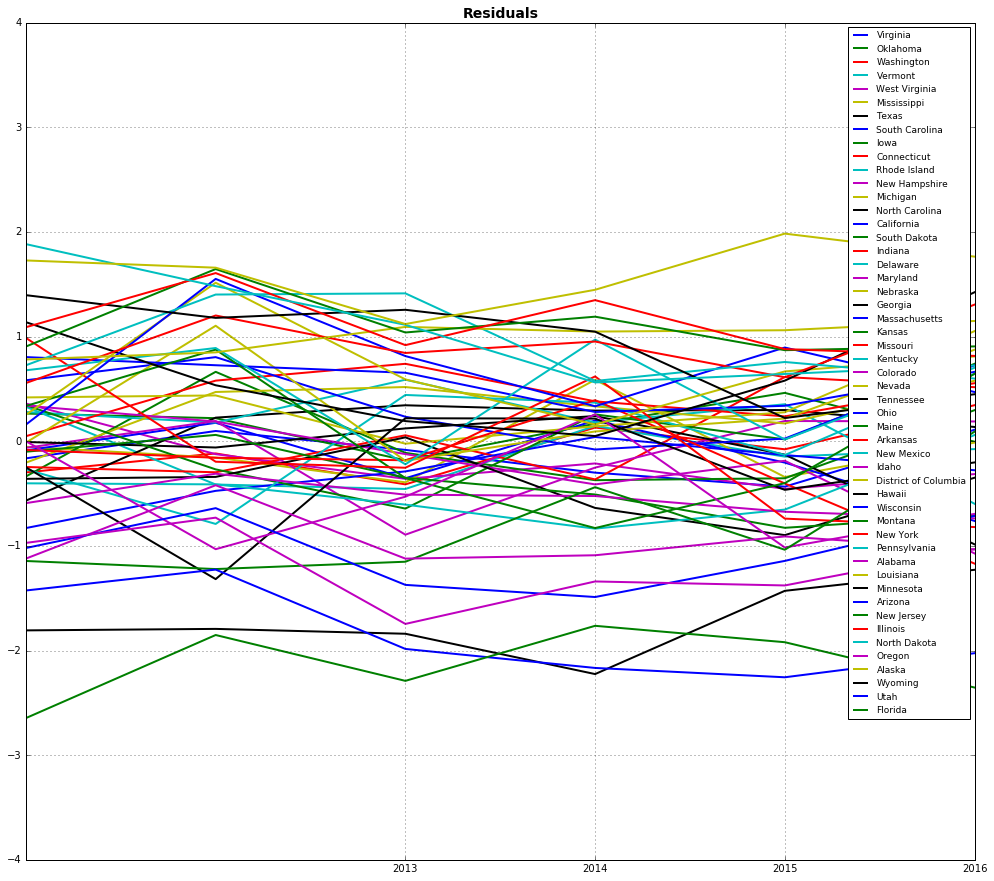

In [27]:
plt.figure(figsize=(17, 15))
plt.plot(e.iloc[:,:-1].T, linewidth = 2)
plt.title('Residuals',fontsize=14, fontweight='bold')
plt.legend(e.index, prop={'size': 9})
plt.xticks(years[2:],years[2:])
plt.ylim(-4,4)
plt.grid()
plt.show()

### spatial cross-validation

In [28]:
# age adjusted data
e = pd.DataFrame(index = years)
r2_model = []
MSE_model = []
columns = []
for state in states:
    print(state)
    s = set(states).difference([state])
    X_train = []
    y_train = []
    for ostate in s:
        x = []
        y_train += [GT2.loc[ostate]]
        for kw in keywords2:
            x += [GoogleTrends2[kw].loc[ostate]]
        x = pd.concat(x, axis = 1)
    
        X_train += [pd.DataFrame(x.values, columns = keywords2)]
        
    # TRAIN
    X_train = pd.concat(X_train, axis = 0)
    X_train = (X_train-X_train.mean())/X_train.std()
    
    y_train = pd.concat(y_train, axis = 0)
    #print(X_train.shape)
    #print(y_train.shape)
    
    # TEST  
    
    X_test = []
    for kw in keywords2:
        X_test += [GoogleTrends2[kw].loc[state]]
    
    X_test = pd.concat(X_test, axis = 1)
    X_test = pd.DataFrame(X_test.values, columns = keywords2)
    X_test = (X_test-X_test.mean())/X_test.std()
    X_test = X_test.fillna(0)
    
    y_test = GT2.loc[state]
    #print(X_test.shape)
    #print(y_test.shape)
    
    
    f,p = f_regression(X_train, y_train.values.ravel())
    cols = X_train.columns[p<10**(-5)]
    print('Features: ', *list(cols))
    columns += list(cols)
    
    model = lr_function(X_train[cols], X_test[cols], y_train, y_test)
    
    r2_model += [model[1]]
    MSE_model += [model[0]]
    e[state] = model[2]
    
    print('MSE',MSE_model[-1])
    print('r2',r2_model[-1])
    
print()
print('MSE',np.mean(MSE_model))
print('r2',np.mean(r2_model))
e = e.T
e['mean squared error'] = np.mean(e**2, axis = 1)
e = e.sort_values('mean squared error')
results2['by states'] = [np.mean(MSE_model), np.mean(r2_model)]

Alabama
Features:  Skin cancer Dermatology
MSE 3.94382204035
r2 -65.6561471608
Alaska
Features:  Latin America Skin cancer
MSE 5.10936273542
r2 -119.220299657
Arizona
Features:  Skin cancer Dermatology Australia Carcinoma
MSE 2.90375652499
r2 -27.4063138314
Arkansas
Features:  Skin cancer Dermatology
MSE 0.578133825658
r2 -2.56383865131
California
Features:  Skin cancer Dermatology
MSE 0.642241248435
r2 -5.13280767736
Colorado
Features:  Skin cancer Dermatology Australia Carcinoma
MSE 0.775268207009
r2 -62.4310351189
Connecticut
Features:  Skin cancer Dermatology
MSE 0.51112267276
r2 -19.6746249656
Delaware
Features:  Skin cancer Dermatology Australia Carcinoma
MSE 0.342846144201
r2 -2.5879247649
District of Columbia
Features:  Dermatology Australia
MSE 5.37569372954
r2 -22.4860405659
Florida
Features:  Latin America Skin cancer Dermatology Carcinoma
MSE 3.74846515144
r2 -69.2837215895
Georgia
Features:  Skin cancer Dermatology Carcinoma
MSE 0.631837842725
r2 -9.7293218576
Hawaii
Featu

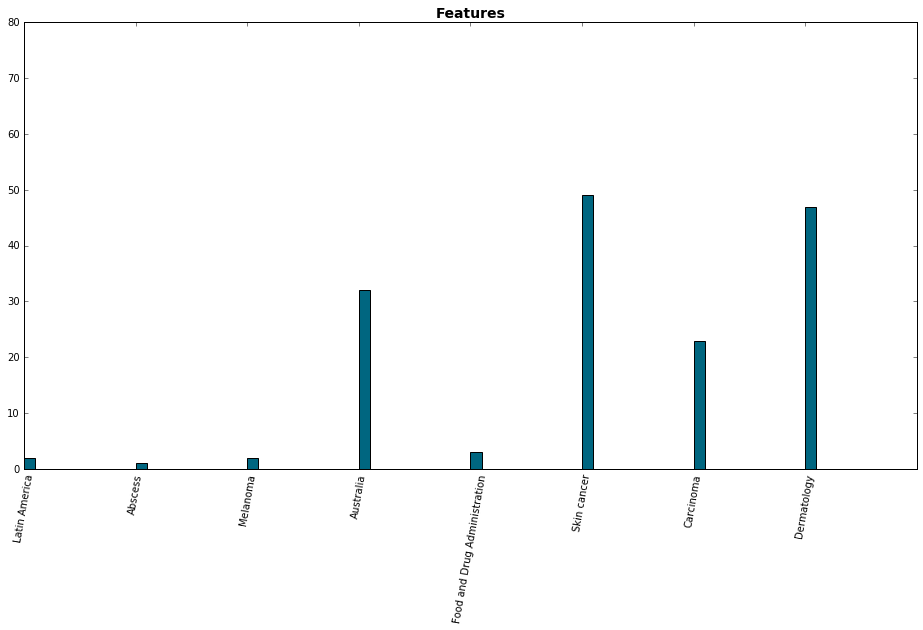

In [29]:
count = Counter(columns)
plt.figure(figsize=(16, 8))
plt.bar(np.arange(len(count)), count.values(), .1, color = nc)
plt.xticks(np.arange(len(count)),count.keys(), rotation=80)
plt.ylim(0,80)
plt.title('Features', fontsize=14, fontweight='bold')
plt.show()

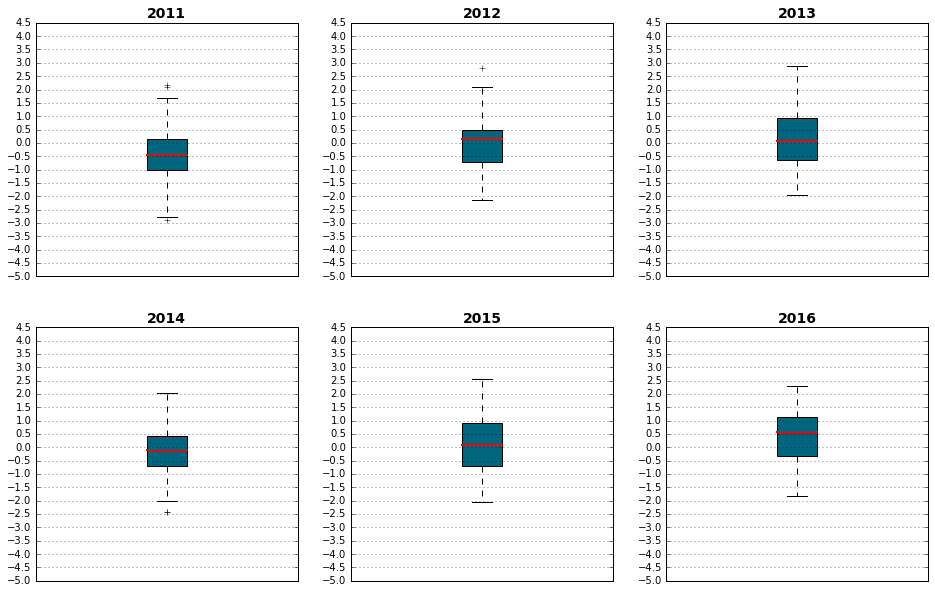

In [30]:
plt.figure(figsize=(16, 10))

for y in range(len(years)):
    plt.subplot(231+y)
    bp = plt.boxplot(e.T.loc[years[y],:], patch_artist = True)
    plt.setp(bp['boxes'], color='black')
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['medians'], color='red', linewidth = 2)
    plt.setp(bp['fliers'], color='black')
    plt.setp(bp['caps'], color='black')
    bp['boxes'][0].set_facecolor(nc)
    plt.title(str(years[y]), fontsize=14, fontweight='bold')
    plt.ylim(-3,3)
    plt.yticks(np.arange(-5,5,.5))
    plt.xticks([])
    plt.grid()
plt.show()

In [31]:
print("Best predicted states, linear regression with F-test:")
print("")
e.head()

Best predicted states, linear regression with F-test:



2011      2012      2013      2014      2015      2016  \
South Dakota   0.226332  0.001178 -0.250636 -0.047265  0.185946 -0.261554   
Rhode Island  -0.375416  0.056668  0.224222 -0.164295 -0.071577 -0.427602   
Vermont       -0.456474  0.173299  0.327656 -0.216155 -0.443456  0.265130   
Mississippi   -0.435741  0.148172 -0.425214  0.208750 -0.090909  0.754942   
New Hampshire -0.708917 -0.154897 -0.749707 -0.184955  0.117807 -0.097331   

               mean squared error  
South Dakota             0.036544  
Rhode Island             0.068231  
Vermont                  0.109905  
Mississippi              0.169068  
New Hampshire            0.191030

In [32]:
print("Worst predicted states, linear regression with F-test:")
print("")
e.tail()

Worst predicted states, linear regression with F-test:



2011      2012      2013      2014      2015  \
Florida              -2.764745 -2.121761 -1.690159 -1.260648 -1.594720   
Alabama              -2.896259 -1.748600 -1.939153 -1.997768 -1.472959   
Utah                 -2.282463 -1.759230 -1.785373 -2.419284 -2.034199   
Alaska                2.156256  2.113435  2.387164  2.027366  2.539951   
District of Columbia  2.101117  2.810431  2.881403  1.989758  1.532336   

                          2016  mean squared error  
Florida              -1.831967            3.748465  
Alabama              -1.515262            3.943822  
Utah                 -1.697451            4.060721  
Alaska                2.297828            5.109363  
District of Columbia  2.308955            5.375694

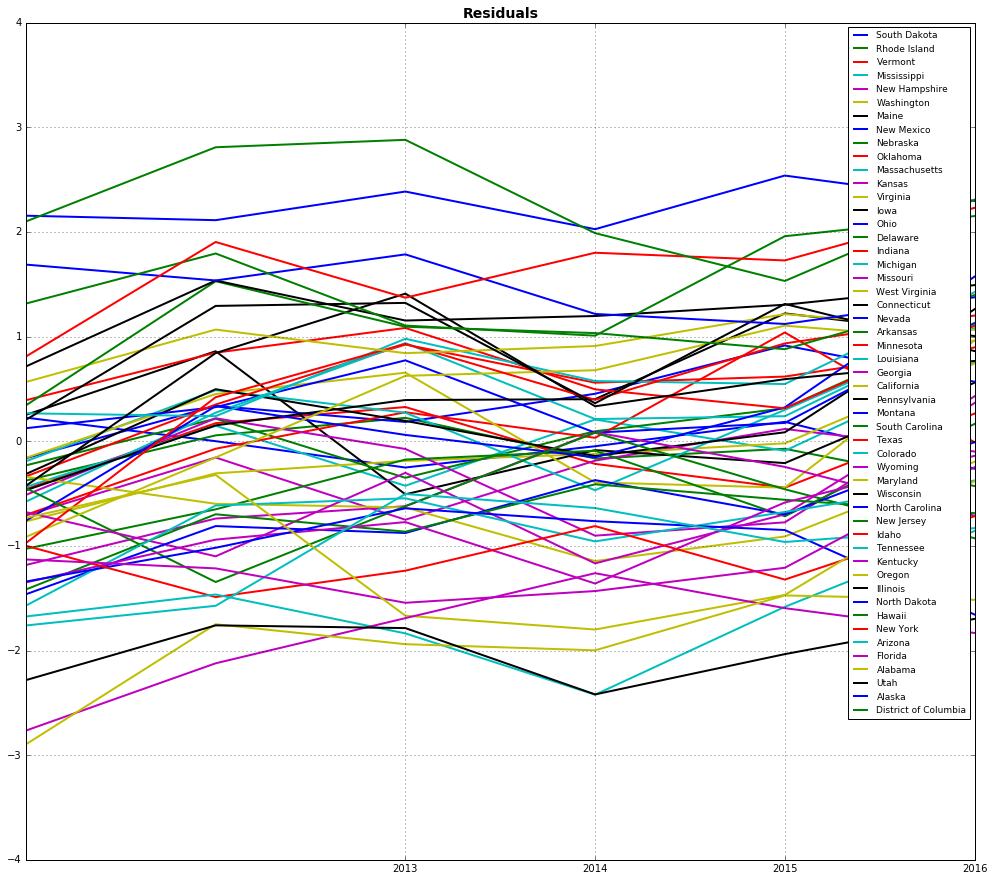

In [33]:
plt.figure(figsize=(17, 15))
plt.plot(e.iloc[:,:-1].T, linewidth = 2)
plt.title('Residuals',fontsize=14, fontweight='bold')
plt.legend(e.index, prop={'size': 9})
plt.xticks(years[2:],years[2:])
plt.ylim(-4,4)
plt.grid()
plt.show()

In [34]:
Rs = [results, results2]
names = ['Crude Prevalence','Age Adjusted']
header = [[names[0]]*2+[names[1]]*2,list(results.columns)+list(results2.columns)]
d = pd.DataFrame(pd.concat(Rs, axis=1).values, columns = header, index = results.index)
d

Crude Prevalence            Age Adjusted           
            by years  by states     by years  by states
MSE         1.025298   1.718551     0.709187   1.149505
R2          0.287834 -24.218245     0.285089 -17.963102

#### Models to predcit age adjusted data has still bad results in terms of MSE and R2. We will show at the end of this notebook a model that performs better results that those shown above.

#  2.2 - Add to your model census features at the US state level (e.g., income data) and discuss how adding them impacts the predictive performance of the model.

#### We collected data related to poverty percentage over all the states in USA.

In [35]:
# Poverty percentage data
P = pd.DataFrame(index = states)
for y in years: 
    df = pd.read_excel(path+'Poverty/Poverty.xlsx', sheetname=str(y))
    df = df.set_index('STATE')
    P[y] = df['Percent']

P = P.fillna(P.median())

## CRUDE PREVALENCE

In [36]:
results3 = pd.DataFrame(index = ['MSE','R2'])  #save the result 

#### temporal cross-validation considering poverty percentage

In [37]:
#script(4)
# crude prevalence data
e = pd.DataFrame(index = states)
r2_model = []
MSE_model = []
columns = []

for year in range(len(years)):
    
    yys = set(range(len(years))).difference([year])
    X_train = []
    y_train = []
    
    for yy in yys:
        x = []
        
        for kw in keywords:
            x += [GoogleTrends[kw].loc[states,years[yy]]]
        x += [pd.DataFrame(P.loc[states,years[yy]].values, columns = ['Poverty'], index = states)]
        x = pd.concat(x, axis = 1)
        X_train += [pd.DataFrame(x.values, columns = keywords+['Poverty'], index = states)]
        
        y_train += [GT.loc[states,str(years[yy])]]
        
    
    # TRAIN
    X_train = pd.concat(X_train, axis = 0)
    X_train = (X_train-X_train.mean())/X_train.std()
    y_train = pd.concat(y_train, axis = 0)
    
    # TEST
    
    x = []
    for kw in keywords:
        x += [GoogleTrends[kw].loc[states,years[year]]]
    
    x += [pd.DataFrame(P.loc[states,years[year]].values, columns = ['Poverty'], index = states)]
    x = pd.concat(x, axis = 1)
    
    X_test = pd.DataFrame(x.values, columns = keywords+['Poverty'], index = states)
    X_test = (X_test-X_test.mean())/X_test.std()
    
    
    y_test = GT.loc[states,str(years[yy])]

    f,p = f_regression(X_train, y_train.values.ravel())
    cols = X_train.columns[p<10**(-2)]
    print('Features: ', *list(cols))
    columns += list(cols)
    
    model = lr_function(X_train[cols], X_test[cols], y_train, y_test)
    
    r2_model += [model[1]]
    MSE_model += [model[0]]
    e[str(years[year])] = model[2]
    
    print(years[year])
    print('MSE',MSE_model[-1])
    print('r2',r2_model[-1])
    
print()
print('MSE',np.mean(MSE_model))
print('r2',np.mean(r2_model))
e['mean squared error'] = np.mean(e**2, axis = 1)
e = e.sort_values('mean squared error')
results3['by years'] = [np.mean(MSE_model), np.mean(r2_model)]

Features:  Prognosis Dermatology.1 Contact dermatitis Prednisone Onychomycosis Cellulitis Abscess Australia Carcinoma Prednisone.1 Skin cancer Dermatology Melanoma Food and Drug Administration
2011
MSE 0.94362555494
r2 0.396275362107
Features:  Prognosis Dermatology.1 Prednisone Onychomycosis Cellulitis Abscess Australia Carcinoma Prednisone.1 Skin cancer Dermatology Melanoma Food and Drug Administration
2012
MSE 1.05233801003
r2 0.326721938886
Features:  Prognosis Dermatology.1 Contact dermatitis Prednisone Onychomycosis Cellulitis Abscess Australia Carcinoma Prednisone.1 Gene Skin cancer Dermatology Melanoma Food and Drug Administration Poverty
2013
MSE 0.998658025264
r2 0.361065995378
Features:  Prognosis Dermatology.1 Contact dermatitis Prednisone Onychomycosis Cellulitis Abscess Australia Carcinoma Prednisone.1 Gene Skin cancer Dermatology Melanoma Food and Drug Administration
2014
MSE 1.1036453028
r2 0.293895913151
Features:  Prognosis Dermatology.1 Contact dermatitis Prednisone 

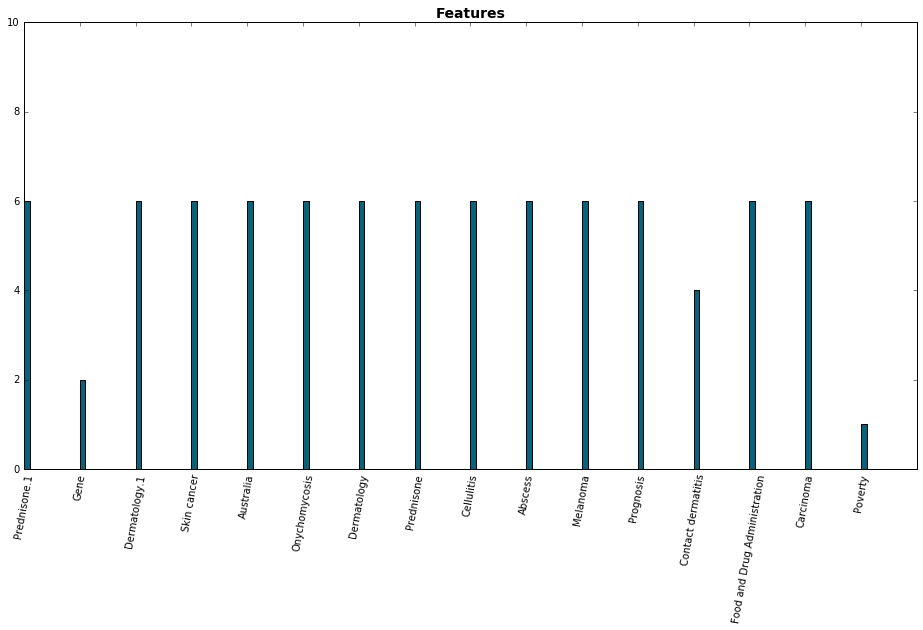

In [38]:
count = Counter(columns)
plt.figure(figsize=(16, 8))
plt.bar(np.arange(len(count)), count.values(), .1, color = nc)
plt.xticks(np.arange(len(count)),count.keys(), rotation=80)
plt.ylim(0,10)
plt.title('Features', fontsize=14, fontweight='bold')
plt.show()

#### We can observe that poverty is taken as a predictor just one time in the last script(4). It means that poverty variable didn't add too much information to improve considerably our predictions. 

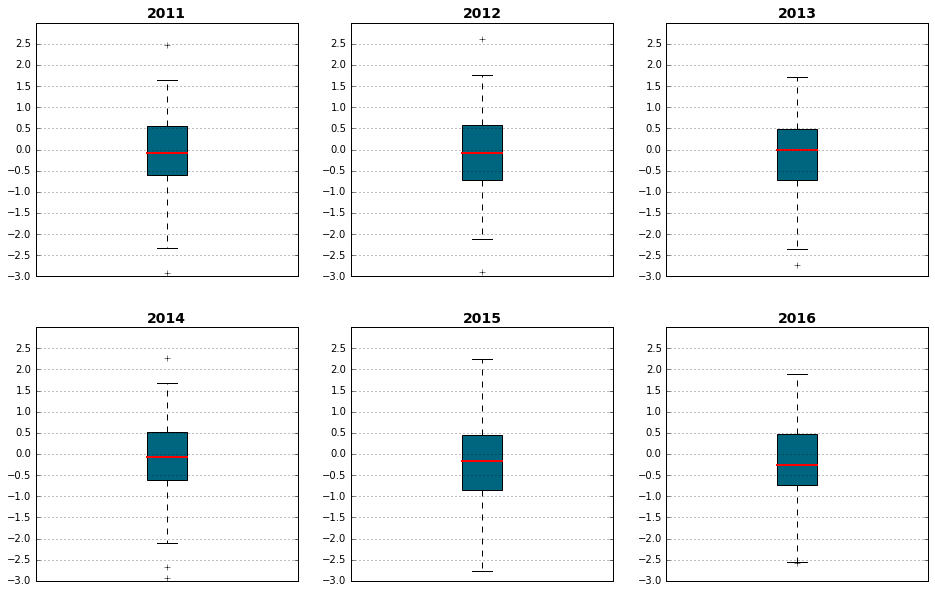

In [39]:
plt.figure(figsize=(16, 10))

for y in range(len(years)):
    plt.subplot(231+y)
    bp = plt.boxplot(e.loc[:,str(years[y])], patch_artist = True)
    plt.setp(bp['boxes'], color='black')
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['medians'], color='red', linewidth = 2)
    plt.setp(bp['fliers'], color='black')
    plt.setp(bp['caps'], color='black')
    bp['boxes'][0].set_facecolor(nc)
    plt.title(str(years[y]), fontsize=14, fontweight='bold')
    plt.ylim(-3,3)
    plt.yticks(np.arange(-3,3,.5))
    plt.xticks([])
    plt.grid()
plt.show()

In [40]:
print("Best predicted states, linear regression with F-test considering Poverty Percentage:")
print("")
e.head()

Best predicted states, linear regression with F-test considering Poverty Percentage:



2011      2012      2013      2014      2015      2016  \
California  -0.080117 -0.045342  0.254588 -0.121696  0.071294 -0.230832   
Michigan    -0.103334 -0.232490 -0.272736  0.041601  0.052004 -0.250282   
Mississippi  0.249331 -0.262799 -0.187008  0.158435 -0.168309  0.197668   
Georgia     -0.235550  0.504803  0.470491 -0.041681  0.127865 -0.141179   
Ohio         0.103912  0.207929  0.258714  0.513153  0.423054 -0.145982   

             mean squared error  
California             0.024411  
Michigan               0.034365  
Mississippi            0.043117  
Georgia                0.094948  
Ohio                   0.097430

In [41]:
print("Worst predicted states, linear regression with F-test considering Poverty Percentage:")
print("")
e.tail()

Worst predicted states, linear regression with F-test considering Poverty Percentage:



2011      2012      2013      2014      2015      2016  \
Arizona -2.317090 -1.491531 -1.751051 -2.047769 -1.568797 -1.539865   
Wyoming -1.782897 -1.601804 -1.915199 -1.220249 -1.466030 -2.589045   
Oregon  -1.367974 -1.000291 -2.353918 -2.667836 -2.171108 -2.556695   
Alaska   2.468269  2.605801  0.634332  2.277067  2.254896  1.897114   
Florida -2.925921 -2.893441 -2.729996 -2.931201 -2.760113 -3.079779   

         mean squared error  
Arizona            3.280903  
Wyoming            3.292315  
Oregon             4.463435  
Alaska             4.525593  
Florida            8.346849

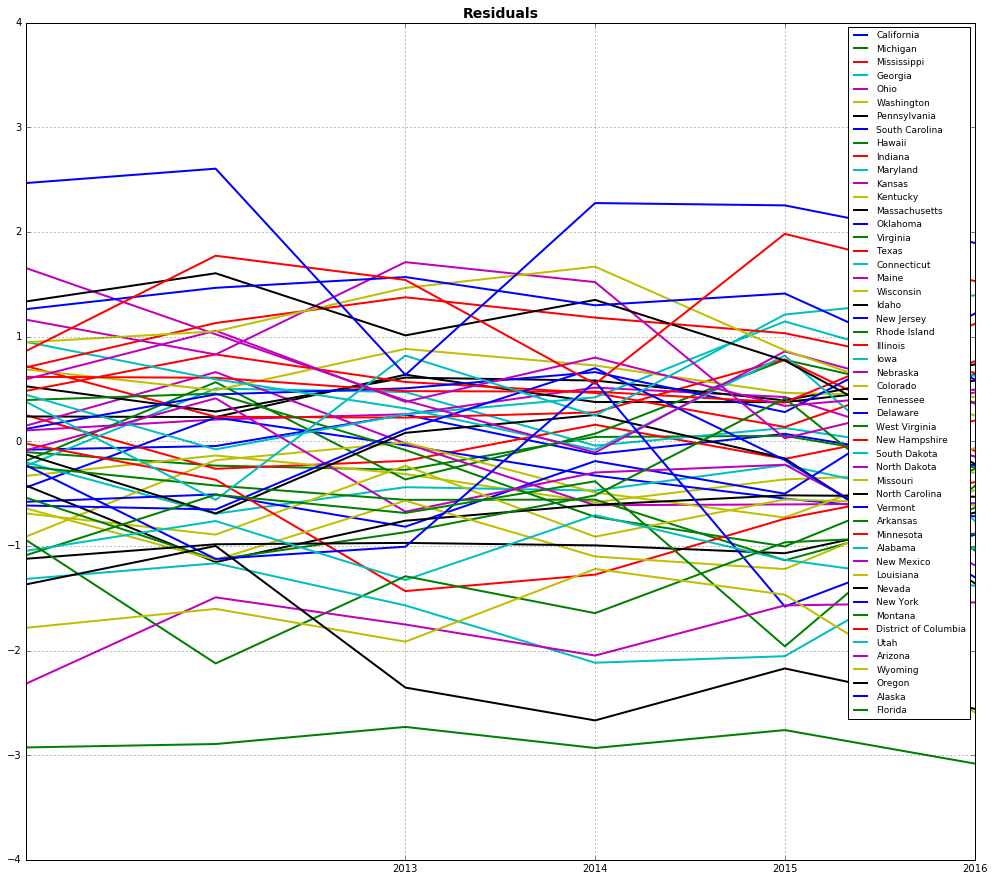

In [42]:
plt.figure(figsize=(17, 15))
plt.plot(e.iloc[:,:-1].T, linewidth = 2)
plt.title('Residuals',fontsize=14, fontweight='bold')
plt.legend(e.index, prop={'size': 9})
plt.xticks(years[2:],years[2:])
plt.ylim(-4,4)
plt.grid()
plt.show()

### Spatial cross-validation considerating poverty percentage

In [43]:
# crude prevalence data
e = pd.DataFrame(index = years)
r2_model = []
MSE_model = []
columns = []
for state in states:
    print(state)
    s = set(states).difference([state])
    X_train = []
    y_train = []
    for ostate in s:
        x = []
        y_train += [GT.loc[ostate]]
        keywords = list(keywords)
        for kw in keywords:
            x += [GoogleTrends[kw].loc[ostate]]
        x += [P.loc[ostate]]
        x = pd.concat(x, axis = 1)
    
        X_train += [pd.DataFrame(x.values, columns = keywords+['Poverty'])]
        
    # TRAIN
    X_train = pd.concat(X_train, axis = 0)
    X_train = (X_train-X_train.mean())/X_train.std()
    
    y_train = pd.concat(y_train, axis = 0)
    #print(X_train.shape)
    #print(y_train.shape)
    
    # TEST  
    
    X_test = []
    for kw in keywords:
        X_test += [GoogleTrends[kw].loc[state]]
        
    X_test += [P.loc[state]]
    X_test = pd.concat(X_test, axis = 1)
    X_test = pd.DataFrame(X_test.values, columns = keywords+['Poverty'])
    X_test = (X_test-X_test.mean())/X_test.std()
    X_test = X_test.fillna(0)
    
    y_test = GT.loc[state]
    #print(X_test.shape)
    #print(y_test.shape)
    
    
    f,p = f_regression(X_train, y_train.values.ravel())
    cols = X_train.columns[p<10**(-6)]
    print('Features: ', *list(cols))
    columns += list(cols)
    
    model = lr_function(X_train[cols], X_test[cols], y_train, y_test)
    
    r2_model += [model[1]]
    MSE_model += [model[0]]
    e[state] = model[2]
    
    print('MSE',MSE_model[-1])
    print('r2',r2_model[-1])
    
print()
print('MSE',np.mean(MSE_model))
print('r2',np.mean(r2_model))
e = e.T
e['mean squared error'] = np.mean(e**2, axis = 1)
e = e.sort_values('mean squared error')
results3['by states'] = [np.mean(MSE_model), np.mean(r2_model)]

Alabama
Features:  Dermatology.1 Australia Carcinoma Skin cancer Dermatology Melanoma
MSE 5.25926670064
r2 -106.575909786
Alaska
Features:  Carcinoma Skin cancer Melanoma
MSE 9.5046697032
r2 -366.922698188
Arizona
Features:  Dermatology.1 Australia Carcinoma Skin cancer Dermatology Melanoma
MSE 3.76323961568
r2 -12.824145527
Arkansas
Features:  Dermatology.1 Australia Carcinoma Skin cancer Dermatology Melanoma
MSE 1.02398189446
r2 -3.1142129688
California
Features:  Dermatology.1 Australia Carcinoma Skin cancer Dermatology Melanoma
MSE 1.30867999485
r2 -12.6954883182
Colorado
Features:  Dermatology.1 Australia Carcinoma Skin cancer Dermatology Melanoma
MSE 0.39017454481
r2 -9.64112394938
Connecticut
Features:  Dermatology.1 Australia Carcinoma Skin cancer Dermatology Melanoma
MSE 0.55323028096
r2 -47.5763173526
Delaware
Features:  Dermatology.1 Australia Carcinoma Skin cancer Dermatology Melanoma
MSE 0.964246901497
r2 -8.83367944869
District of Columbia
Features:  Dermatology.1 Austral

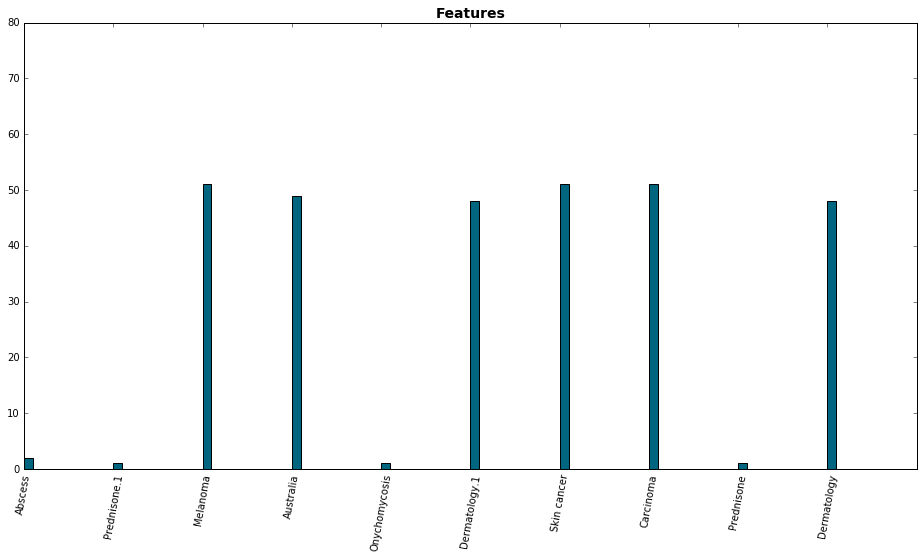

In [44]:
count = Counter(columns)
plt.figure(figsize=(16, 8))
plt.bar(np.arange(len(count)), count.values(), .1, color = nc)
plt.xticks(np.arange(len(count)),count.keys(), rotation=80)
plt.ylim(0,80)
plt.title('Features', fontsize=14, fontweight='bold')
plt.show()

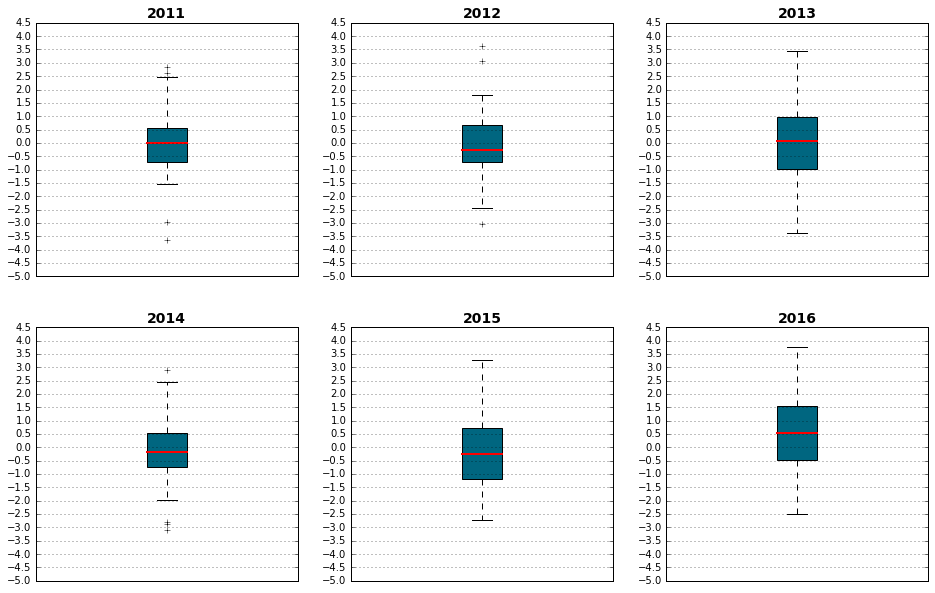

In [45]:
plt.figure(figsize=(16, 10))

for y in range(len(years)):
    plt.subplot(231+y)
    bp = plt.boxplot(e.T.loc[years[y],:], patch_artist = True)
    plt.setp(bp['boxes'], color='black')
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['medians'], color='red', linewidth = 2)
    plt.setp(bp['fliers'], color='black')
    plt.setp(bp['caps'], color='black')
    bp['boxes'][0].set_facecolor(nc)
    plt.title(str(years[y]), fontsize=14, fontweight='bold')
    plt.ylim(-3,3)
    plt.yticks(np.arange(-5,5,.5))
    plt.xticks([])
    plt.grid()
plt.show()

In [46]:
print("Best predicted states, linear regression with F-test considering Poverty Percentage:")
print("")
e.head()

Best predicted states, linear regression with F-test considering Poverty Percentage:



2011      2012      2013      2014      2015      2016  \
South Dakota -0.209030 -0.505944  0.060173 -0.647459  0.106596  0.075665   
Rhode Island -0.719343  0.292602 -0.154495 -0.136541 -0.453397 -0.560825   
Iowa          0.012636 -0.195653  0.206100 -0.477550 -0.306000  0.966467   
Oklahoma     -0.595131 -0.708064  0.385990  0.545949  0.705133  0.280124   
Ohio          0.123130 -0.348454  0.614406 -0.018690  0.323546  1.144062   

              mean squared error  
South Dakota            0.123264  
Rhode Island            0.194279  
Iowa                    0.222777  
Oklahoma                0.313044  
Ohio                    0.321331

In [47]:
print("Worst predicted states, linear regression with F-test considering Poverty Percentage:")
print("")
e.tail()

Worst predicted states, linear regression with F-test considering Poverty Percentage:



2011      2012      2013      2014      2015  \
Arizona              -1.519366 -1.737949 -2.310517 -2.857452 -1.597352   
Alabama              -2.965936 -2.447192 -2.333747 -1.911660 -1.806229   
Alaska                2.848792  3.071746  2.559202  2.880458  3.258404   
Florida              -3.641900 -3.026933 -3.381754 -3.094166 -2.719588   
District of Columbia  2.629824  3.613877  3.452287  2.457541  2.788040   

                          2016  mean squared error  
Arizona              -1.093365            3.763240  
Alabama              -2.099236            5.259267  
Alaska                3.743398            9.504670  
Florida              -2.493658            9.508396  
District of Columbia  3.726432            9.932222

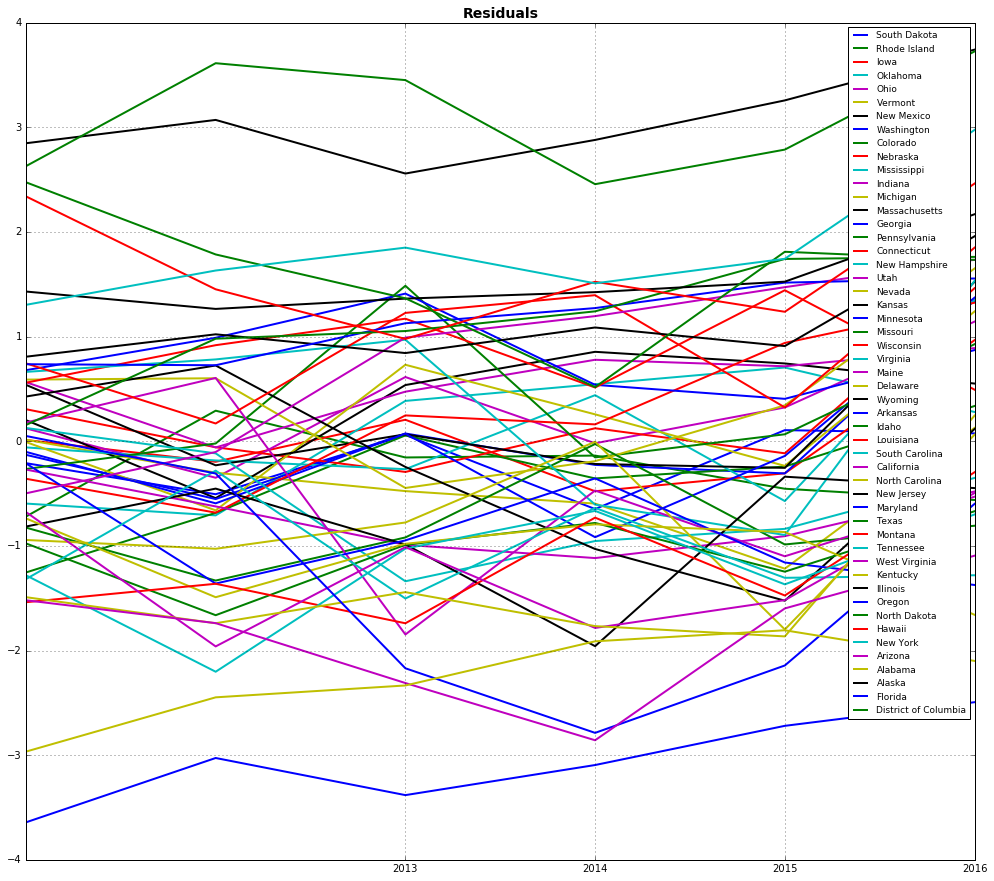

In [48]:
plt.figure(figsize=(17, 15))
plt.plot(e.iloc[:,:-1].T, linewidth = 2)
plt.title('Residuals',fontsize=14, fontweight='bold')
plt.legend(e.index, prop={'size': 9})
plt.xticks(years[2:],years[2:])
plt.ylim(-4,4)
plt.grid()
plt.show()

## AGE ADJUSTED

In [49]:
results4 = pd.DataFrame(index = ['MSE','R2'])

### temporal cross-validation

In [50]:
# age adjusted data
e = pd.DataFrame(index = states)
r2_model = []
MSE_model = []
columns = []
for year in range(len(years)):
    yys = set(range(len(years))).difference([year])
    X_train = []
    y_train = []
    for yy in yys:
        x = []
        for kw in keywords2:
            x += [GoogleTrends2[kw].loc[states,years[yy]]]
        x += [pd.DataFrame(P.loc[states,years[yy]].values, columns = ['Poverty'], index = states)]
        x = pd.concat(x, axis = 1)
        X_train += [pd.DataFrame(x.values, columns = keywords2+['Poverty'], index = states)]
        
        y_train += [GT2.loc[states,str(years[yy])]]
        
    
    # TRAIN
    X_train = pd.concat(X_train, axis = 0)
    X_train = (X_train-X_train.mean())/X_train.std()
    y_train = pd.concat(y_train, axis = 0)
    #print(X_train.shape)
    #print(y_train.shape)
    
    # TEST
    
    x = []
    for kw in keywords2:
        x += [GoogleTrends2[kw].loc[states,years[year]]]
    
    x += [pd.DataFrame(P.loc[states,years[year]].values, columns = ['Poverty'], index = states)]
    x = pd.concat(x, axis = 1)
    
    X_test = pd.DataFrame(x.values, columns = keywords2+['Poverty'], index = states)
    X_test = (X_test-X_test.mean())/X_test.std()
    
    
    y_test = GT2.loc[states,str(years[yy])]
    #print(X_test.shape)
    #print(y_test.shape)
    #print(X_train.iloc[:5,:5])
    
    f,p = f_regression(X_train, y_train.values.ravel())
    cols = X_train.columns[p<10**(-2)]
    print('Features: ', *list(cols))
    columns += list(cols)
    
    model = lr_function(X_train[cols], X_test[cols], y_train, y_test)
    
    r2_model += [model[1]]
    MSE_model += [model[0]]
    e[str(years[year])] = model[2]
    
    print(years[year])
    print('MSE',MSE_model[-1])
    print('r2',r2_model[-1])
    
print()
print('MSE',np.mean(MSE_model))
print('r2',np.mean(r2_model))
e['mean squared error'] = np.mean(e**2, axis = 1)
e = e.sort_values('mean squared error')
results4['by years'] = [np.mean(MSE_model), np.mean(r2_model)]

Features:  Latin America Skin cancer Dermatology Abscess Melanoma Australia Food and Drug Administration Carcinoma Poverty
2011
MSE 0.735522372463
r2 0.261462144251
Features:  Latin America Skin cancer Dermatology Abscess Melanoma Australia Food and Drug Administration Carcinoma
2012
MSE 0.791400040669
r2 0.205355389641
Features:  Latin America Skin cancer Dermatology Abscess Melanoma Australia Food and Drug Administration Carcinoma Poverty
2013
MSE 0.751567805193
r2 0.245350928702
Features:  Latin America Skin cancer Dermatology Abscess Melanoma Australia Food and Drug Administration Carcinoma Poverty
2014
MSE 0.76623734887
r2 0.230621243057
Features:  Latin America Skin cancer Dermatology Abscess Melanoma Australia Food and Drug Administration Carcinoma Poverty
2015
MSE 0.685324294967
r2 0.311866023051
Features:  Latin America Skin cancer Dermatology Abscess Melanoma Australia Food and Drug Administration Carcinoma Poverty
2016
MSE 0.747915594607
r2 0.204995438559

MSE 0.746327909461

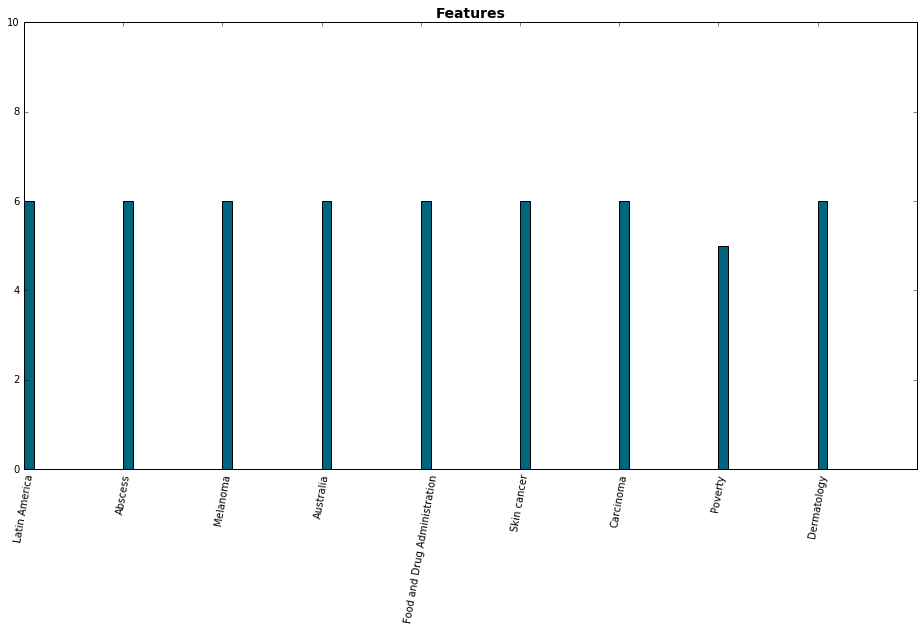

In [51]:
count = Counter(columns)
plt.figure(figsize=(16, 8))
plt.bar(np.arange(len(count)), count.values(), .1, color = nc)
plt.xticks(np.arange(len(count)),count.keys(), rotation=80)
plt.ylim(0,10)
plt.title('Features', fontsize=14, fontweight='bold')
plt.show()

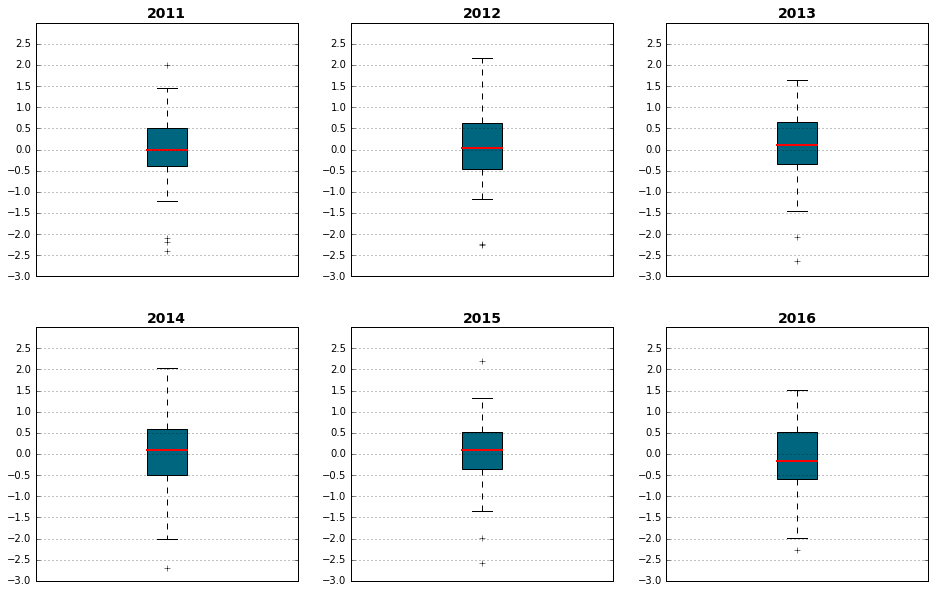

In [52]:
plt.figure(figsize=(16, 10))

for y in range(len(years)):
    plt.subplot(231+y)
    bp = plt.boxplot(e.loc[:,str(years[y])], patch_artist = True)
    plt.setp(bp['boxes'], color='black')
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['medians'], color='red', linewidth = 2)
    plt.setp(bp['fliers'], color='black')
    plt.setp(bp['caps'], color='black')
    bp['boxes'][0].set_facecolor(nc)
    plt.title(str(years[y]), fontsize=14, fontweight='bold')
    plt.ylim(-3,3)
    plt.yticks(np.arange(-3,3,.5))
    plt.xticks([])
    plt.grid()
plt.show()

In [53]:
print("Best predicted states, linear regression with F-test considering Poverty Percentage:")
print("")
e.head()

Best predicted states, linear regression with F-test considering Poverty Percentage:



2011      2012      2013      2014      2015      2016  \
Washington    -0.057117  0.178561  0.264022  0.087741  0.092039 -0.164132   
California     0.086665 -0.058204 -0.022952 -0.115597  0.058742 -0.471457   
West Virginia -0.052927 -0.165812 -0.471753  0.300197  0.089349 -0.261979   
Virginia       0.304224  0.260887  0.316490 -0.237966 -0.239290 -0.212910   
Mississippi    0.001742 -0.191521 -0.231755  0.590241  0.055404  0.221836   

               mean squared error  
Washington               0.024661  
California               0.041752  
West Virginia            0.069930  
Virginia                 0.070000  
Mississippi              0.081843

In [54]:
print("Worst predicted states, linear regression with F-test considering Poverty Percentage:")
print("")
e.tail()

Worst predicted states, linear regression with F-test considering Poverty Percentage:



2011      2012      2013      2014      2015      2016  \
Louisiana  1.315359  1.671454  1.536797  1.622431  1.285289  0.759953   
Wyoming   -2.093753 -0.938570 -1.200491 -1.416378 -0.988396 -1.688487   
Alaska     1.992310  2.170599  1.657641  2.039297  2.197859  1.518689   
Florida   -2.408535 -2.237551 -2.073844 -2.006437 -1.983646 -2.272980   
Utah      -2.185538 -2.265972 -2.636754 -2.692832 -2.573079 -1.991303   

           mean squared error  
Louisiana            1.957908  
Wyoming              2.089990  
Alaska               3.787385  
Florida              4.705930  
Utah                 5.783507

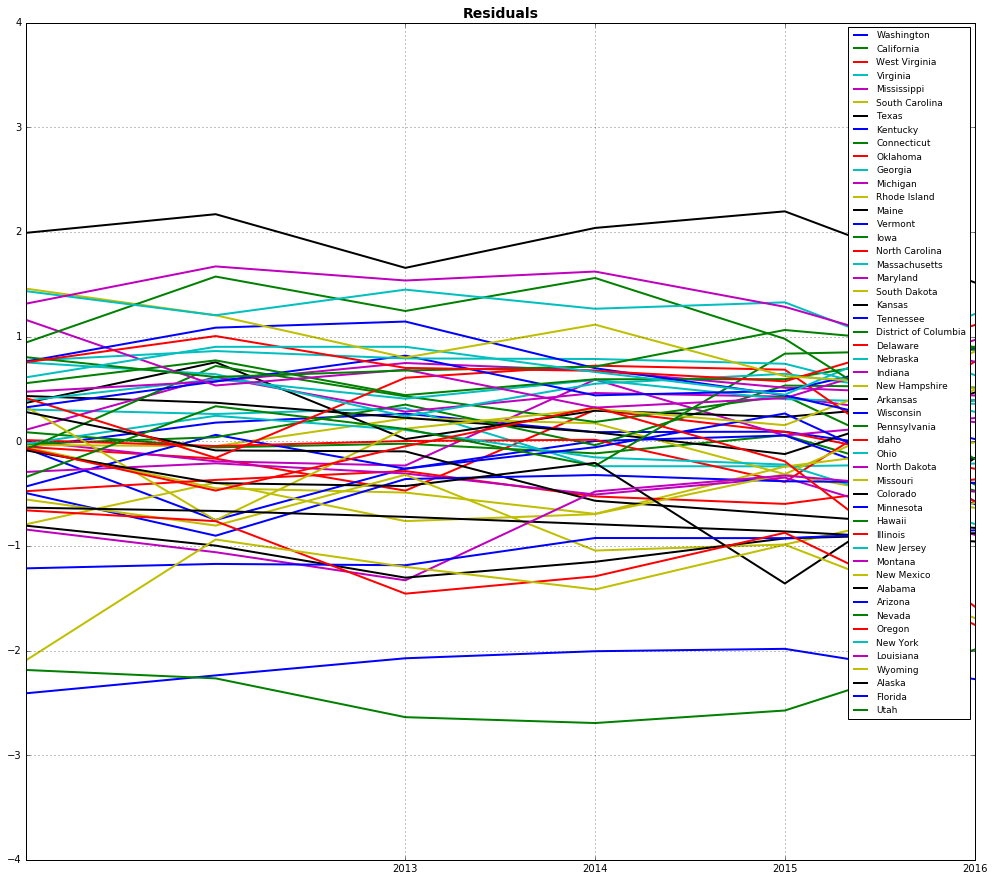

In [55]:
plt.figure(figsize=(17, 15))
plt.plot(e.iloc[:,:-1].T, linewidth = 2)
plt.title('Residuals',fontsize=14, fontweight='bold')
plt.legend(e.index, prop={'size': 9})
plt.xticks(years[2:],years[2:])
plt.ylim(-4,4)
plt.grid()
plt.show()

### Spatial cross-validation 

In [56]:
# crude prevalence data
e = pd.DataFrame(index = years)
r2_model = []
MSE_model = []
columns = []

for state in states:
    
    print(state)
    s = set(states).difference([state])
    X_train = []
    y_train = []
    
    for ostate in s:
        
        x = []
        y_train += [GT2.loc[ostate]]
        for kw in keywords2:
            x += [GoogleTrends2[kw].loc[ostate]]
        x += [P.loc[ostate]]
        x = pd.concat(x, axis = 1)
    
        X_train += [pd.DataFrame(x.values, columns = keywords2+['Poverty'])]
        
    # TRAIN
    X_train = pd.concat(X_train, axis = 0)
    X_train = (X_train-X_train.mean())/X_train.std()
    
    y_train = pd.concat(y_train, axis = 0)
    #print(X_train.shape)
    #print(y_train.shape)
    
    # TEST  
    
    X_test = []
    for kw in keywords2:
        X_test += [GoogleTrends2[kw].loc[state]]
        
    X_test += [P.loc[state]]
    X_test = pd.concat(X_test, axis = 1)
    X_test = pd.DataFrame(X_test.values, columns = keywords2+['Poverty'])
    X_test = (X_test-X_test.mean())/X_test.std()
    X_test = X_test.fillna(0)
    
    y_test = GT2.loc[state]
    #print(X_test.shape)
    #print(y_test.shape)
    
    
    f,p = f_regression(X_train, y_train.values.ravel())
    cols = X_train.columns[p<10**(-5)]
    print('Features: ', *list(cols))
    columns += list(cols)
    
    model = lr_function(X_train[cols], X_test[cols], y_train, y_test)
    
    r2_model += [model[1]]
    MSE_model += [model[0]]
    e[state] = model[2]
    
    print('MSE',MSE_model[-1])
    print('r2',r2_model[-1])
    
print()
print('MSE',np.mean(MSE_model))
print('r2',np.mean(r2_model))
e = e.T
e['mean squared error'] = np.mean(e**2, axis = 1)
e = e.sort_values('mean squared error')
results4['by states'] = [np.mean(MSE_model), np.mean(r2_model)]

Alabama
Features:  Skin cancer Dermatology
MSE 3.94382204035
r2 -65.6561471608
Alaska
Features:  Latin America Skin cancer
MSE 5.10936273542
r2 -119.220299657
Arizona
Features:  Skin cancer Dermatology Australia Carcinoma
MSE 2.90375652499
r2 -27.4063138314
Arkansas
Features:  Skin cancer Dermatology
MSE 0.578133825658
r2 -2.56383865131
California
Features:  Skin cancer Dermatology
MSE 0.642241248435
r2 -5.13280767736
Colorado
Features:  Skin cancer Dermatology Australia Carcinoma
MSE 0.775268207009
r2 -62.4310351189
Connecticut
Features:  Skin cancer Dermatology
MSE 0.51112267276
r2 -19.6746249656
Delaware
Features:  Skin cancer Dermatology Australia Carcinoma
MSE 0.342846144201
r2 -2.5879247649
District of Columbia
Features:  Dermatology Australia
MSE 5.37569372954
r2 -22.4860405659
Florida
Features:  Latin America Skin cancer Dermatology Carcinoma
MSE 3.74846515144
r2 -69.2837215895
Georgia
Features:  Skin cancer Dermatology Carcinoma
MSE 0.631837842725
r2 -9.7293218576
Hawaii
Featu

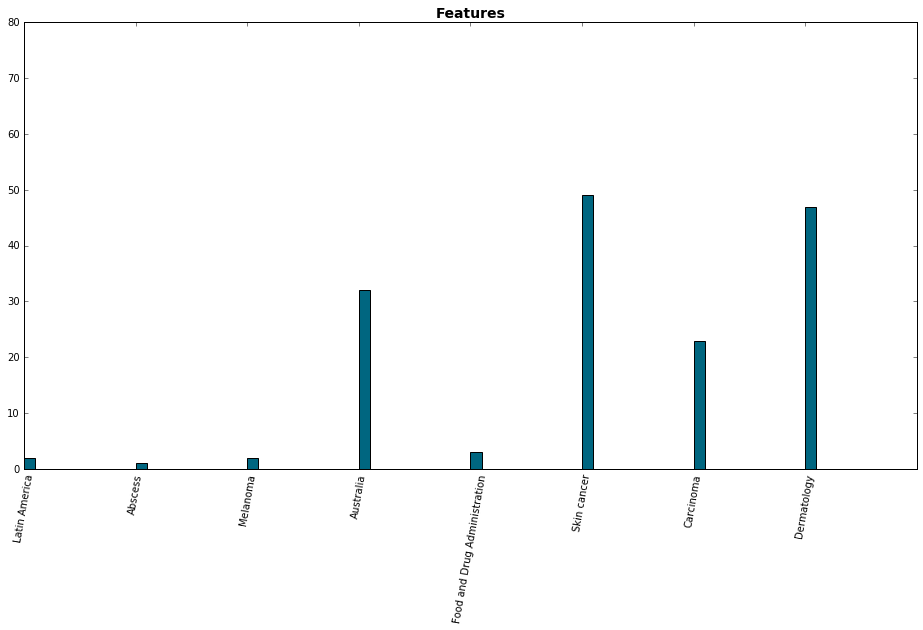

In [57]:
count = Counter(columns)
plt.figure(figsize=(16, 8))
plt.bar(np.arange(len(count)), count.values(), .1, color = nc)
plt.xticks(np.arange(len(count)),count.keys(), rotation=80)
plt.ylim(0,80)
plt.title('Features', fontsize=14, fontweight='bold')
plt.show()

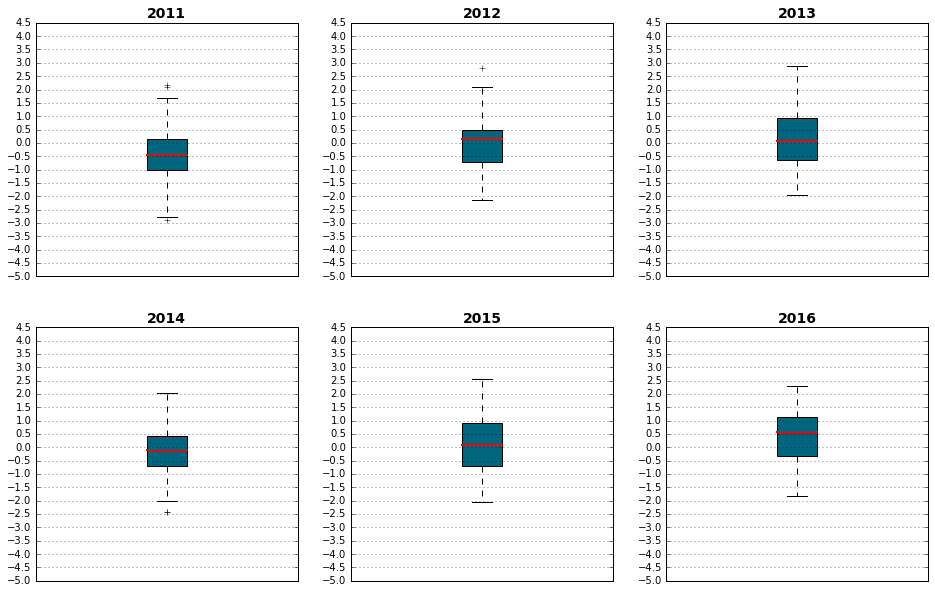

In [58]:
plt.figure(figsize=(16, 10))

for y in range(len(years)):
    plt.subplot(231+y)
    bp = plt.boxplot(e.T.loc[years[y],:], patch_artist = True)
    plt.setp(bp['boxes'], color='black')
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['medians'], color='red', linewidth = 2)
    plt.setp(bp['fliers'], color='black')
    plt.setp(bp['caps'], color='black')
    bp['boxes'][0].set_facecolor(nc)
    plt.title(str(years[y]), fontsize=14, fontweight='bold')
    plt.ylim(-3,3)
    plt.yticks(np.arange(-5,5,.5))
    plt.xticks([])
    plt.grid()
plt.show()

In [59]:
print("Best predicted states, linear regression with F-test considering Poverty Percentage:")
print("")
e.head()

Best predicted states, linear regression with F-test considering Poverty Percentage:



2011      2012      2013      2014      2015      2016  \
South Dakota   0.226332  0.001178 -0.250636 -0.047265  0.185946 -0.261554   
Rhode Island  -0.375416  0.056668  0.224222 -0.164295 -0.071577 -0.427602   
Vermont       -0.456474  0.173299  0.327656 -0.216155 -0.443456  0.265130   
Mississippi   -0.435741  0.148172 -0.425214  0.208750 -0.090909  0.754942   
New Hampshire -0.708917 -0.154897 -0.749707 -0.184955  0.117807 -0.097331   

               mean squared error  
South Dakota             0.036544  
Rhode Island             0.068231  
Vermont                  0.109905  
Mississippi              0.169068  
New Hampshire            0.191030

In [60]:
print("Worst predicted states, linear regression with F-test considering Poverty Percentage:")
print("")
e.tail()

Worst predicted states, linear regression with F-test considering Poverty Percentage:



2011      2012      2013      2014      2015  \
Florida              -2.764745 -2.121761 -1.690159 -1.260648 -1.594720   
Alabama              -2.896259 -1.748600 -1.939153 -1.997768 -1.472959   
Utah                 -2.282463 -1.759230 -1.785373 -2.419284 -2.034199   
Alaska                2.156256  2.113435  2.387164  2.027366  2.539951   
District of Columbia  2.101117  2.810431  2.881403  1.989758  1.532336   

                          2016  mean squared error  
Florida              -1.831967            3.748465  
Alabama              -1.515262            3.943822  
Utah                 -1.697451            4.060721  
Alaska                2.297828            5.109363  
District of Columbia  2.308955            5.375694

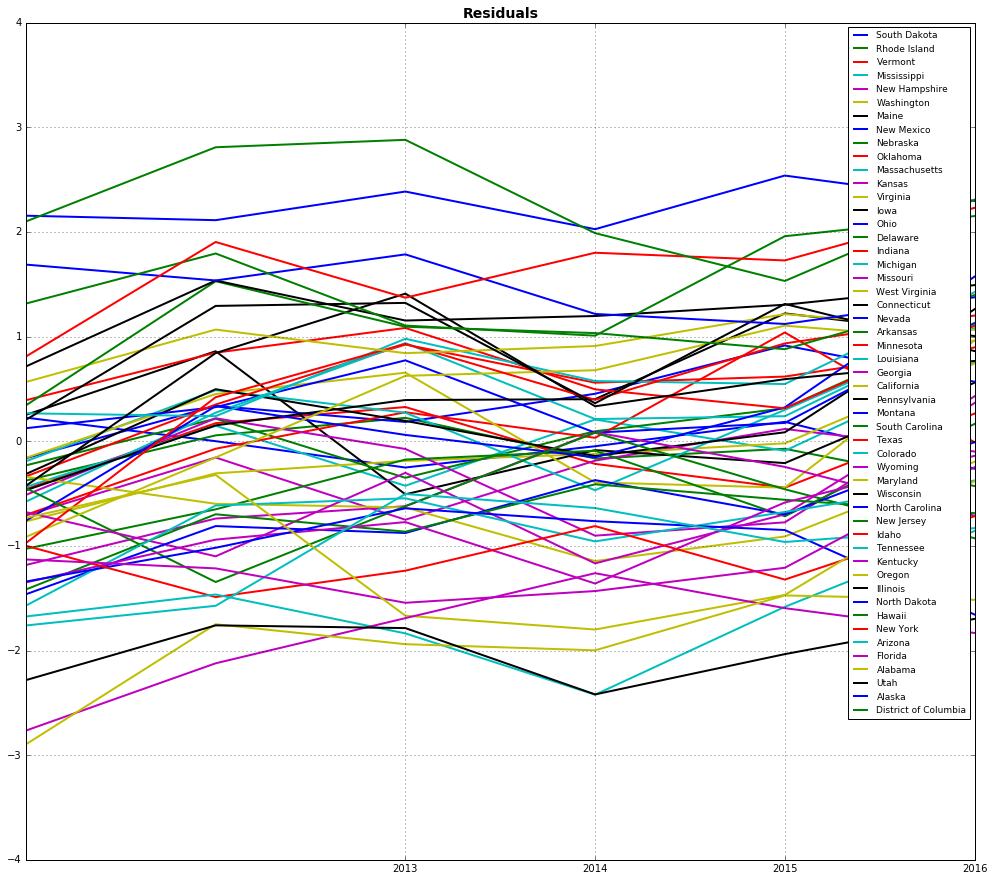

In [61]:
plt.figure(figsize=(17, 15))
plt.plot(e.iloc[:,:-1].T, linewidth = 2)
plt.title('Residuals',fontsize=14, fontweight='bold')
plt.legend(e.index, prop={'size': 9})
plt.xticks(years[2:],years[2:])
plt.ylim(-4,4)
plt.grid()
plt.show()

In [62]:
Rs = [results3, results4]
names = ['Crude Prevalence','Age Adjusted']
header = [[names[0]]*2+[names[1]]*2,list(results.columns)+list(results2.columns)]
d = pd.DataFrame(pd.concat(Rs, axis=1).values, columns = header, index = results.index)
d

Crude Prevalence            Age Adjusted           
            by years  by states     by years  by states
MSE         1.049709   1.718551     0.746328   1.149505
R2          0.324316 -24.218245     0.243275 -17.963102

#### The above summarize the models we performed in terms of mean square errors and coefficients of determination. As we observed before, models with spatial cross- validation gave bad results. The negative coefficients of determination can be explained with the presence of too many variable that doesn't carry any information for setting the model up.

#### Models setted up with temporal cross-validation have a better result in both indicators, much better in the prediction of Age Adjusted as target. The use of poverty percentage as variable dind't give considarable improvements to the models.

#  2.3 - Look for data on health insurance coverage across US states (any source you can find) and integrate it in your model. Repeat the above evaluation.

## CRUDE PREVALENCE

In [63]:
#Health insurance data
HIC = pd.DataFrame(index = states)
for y in years:
    df = pd.read_csv(path+'Insurance/HealthCareCoverage_'+str(y)+'.csv')
    df = df.set_index('LocationDesc')
    HIC[y] = df.loc[states,'Data_Value']
HIC = HIC.fillna(HIC.median())
#HIC

In [64]:
results5 = pd.DataFrame(index = ['MSE','R2'])#save results

### temporal cross-validation with health inscurance data

In [65]:
# crude prevalence data
e = pd.DataFrame(index = states)
r2_model = []
MSE_model = []
columns = []
for year in range(len(years)):
    
    yys = set(range(len(years))).difference([year])
    X_train = []
    y_train = []
    
    for yy in yys:
        
        x = []
        for kw in keywords:
            
            x += [GoogleTrends[kw].loc[states,years[yy]]]
        x += [pd.DataFrame(P.loc[states,years[yy]].values, columns = ['Poverty'], index = states)]
        x += [pd.DataFrame(HIC.loc[states,years[yy]].values, columns = ['Health Insurance'], index = states)]
        x = pd.concat(x, axis = 1)
        X_train += [pd.DataFrame(x.values, columns = keywords+['Poverty','Health Insurance'], index = states)]
        
        y_train += [GT.loc[states,str(years[yy])]]
        
    
    # TRAIN
    X_train = pd.concat(X_train, axis = 0)
    X_train = (X_train-X_train.mean())/X_train.std()
    y_train = pd.concat(y_train, axis = 0)
 
    # TEST
    
    x = []
    for kw in keywords:
        
        x += [GoogleTrends[kw].loc[states,years[year]]]
    
    x += [pd.DataFrame(P.loc[states,years[year]].values, columns = ['Poverty'], index = states)]
    x += [pd.DataFrame(HIC.loc[states,years[year]].values, columns = ['Health Insurance'], index = states)]
    x = pd.concat(x, axis = 1)
    
    X_test = pd.DataFrame(x.values, columns = keywords+['Poverty','Health Insurance'], index = states)
    X_test = (X_test-X_test.mean())/X_test.std()
    
    
    y_test = GT.loc[states,str(years[yy])]
    
    f,p = f_regression(X_train, y_train.values.ravel())
    cols = X_train.columns[p<10**(-2)]
    print('Features: ', *list(cols))
    columns += list(cols)
    
    model = lr_function(X_train[cols], X_test[cols], y_train, y_test)
    
    r2_model += [model[1]]
    MSE_model += [model[0]]
    e[str(years[year])] = model[2]
    
    print(years[year])
    print('MSE',MSE_model[-1])
    print('r2',r2_model[-1])
    
print()
print('MSE',np.mean(MSE_model))
print('r2',np.mean(r2_model))
e['mean squared error'] = np.mean(e**2, axis = 1)
e = e.sort_values('mean squared error')
results5['by years'] = [np.mean(MSE_model), np.mean(r2_model)]

Features:  Prognosis Dermatology.1 Contact dermatitis Prednisone Onychomycosis Cellulitis Abscess Australia Carcinoma Prednisone.1 Skin cancer Dermatology Melanoma Food and Drug Administration
2011
MSE 0.94362555494
r2 0.396275362107
Features:  Prognosis Dermatology.1 Prednisone Onychomycosis Cellulitis Abscess Australia Carcinoma Prednisone.1 Skin cancer Dermatology Melanoma Food and Drug Administration
2012
MSE 1.05233801003
r2 0.326721938886
Features:  Prognosis Dermatology.1 Contact dermatitis Prednisone Onychomycosis Cellulitis Abscess Australia Carcinoma Prednisone.1 Gene Skin cancer Dermatology Melanoma Food and Drug Administration Poverty
2013
MSE 0.998658025264
r2 0.361065995378
Features:  Prognosis Dermatology.1 Contact dermatitis Prednisone Onychomycosis Cellulitis Abscess Australia Carcinoma Prednisone.1 Gene Skin cancer Dermatology Melanoma Food and Drug Administration
2014
MSE 1.1036453028
r2 0.293895913151
Features:  Prognosis Dermatology.1 Contact dermatitis Prednisone 

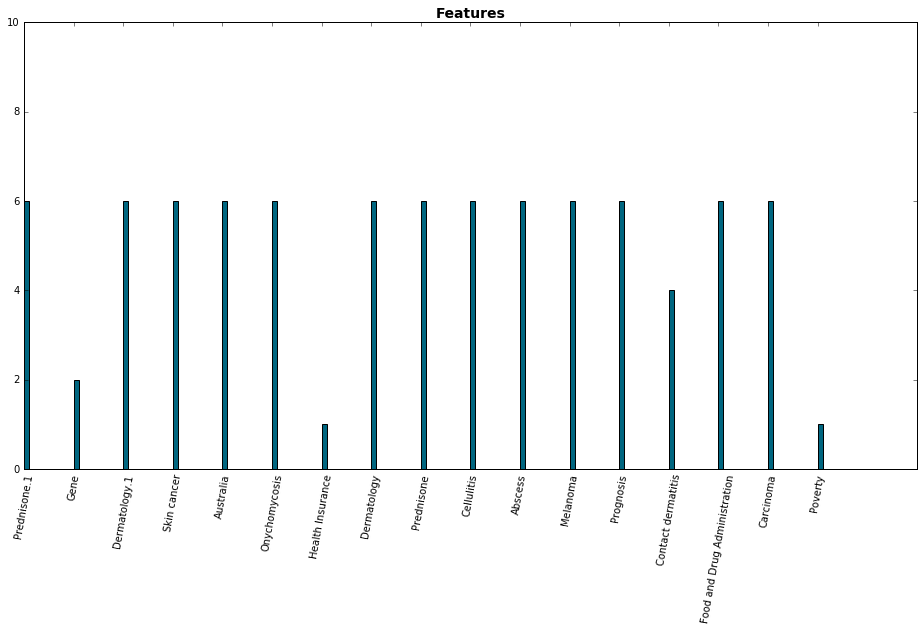

In [66]:

count = Counter(columns)
plt.figure(figsize=(16, 8))
plt.bar(np.arange(len(count)), count.values(), .1, color = nc)
plt.xticks(np.arange(len(count)),count.keys(), rotation=80)
plt.ylim(0,10)
plt.title('Features', fontsize=14, fontweight='bold')
plt.show()

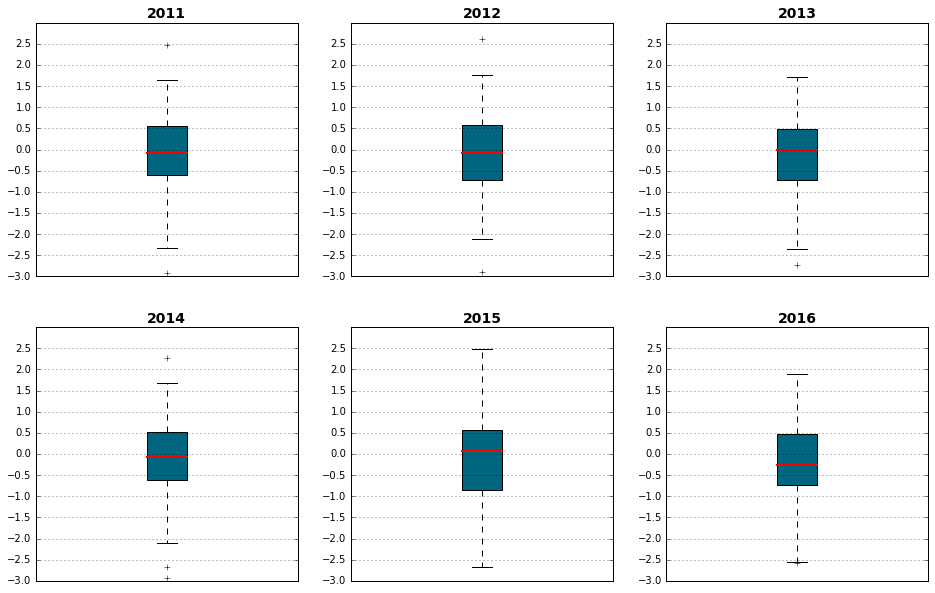

In [67]:
plt.figure(figsize=(16, 10))

for y in range(len(years)):
    plt.subplot(231+y)
    bp = plt.boxplot(e.loc[:,str(years[y])], patch_artist = True)
    plt.setp(bp['boxes'], color='black')
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['medians'], color='red', linewidth = 2)
    plt.setp(bp['fliers'], color='black')
    plt.setp(bp['caps'], color='black')
    bp['boxes'][0].set_facecolor(nc)
    plt.title(str(years[y]), fontsize=14, fontweight='bold')
    plt.ylim(-3,3)
    plt.yticks(np.arange(-3,3,.5))
    plt.xticks([])
    plt.grid()
plt.show()

In [68]:
print("Best predicted states, linear regression with F-test considering Poverty Percentage and Health Insurance:")
print("")
e.head()

Best predicted states, linear regression with F-test considering Poverty Percentage and Health Insurance:



2011      2012      2013      2014      2015      2016  \
California  -0.080117 -0.045342  0.254588 -0.121696 -0.013465 -0.230832   
Michigan    -0.103334 -0.232490 -0.272736  0.041601 -0.300011 -0.250282   
Ohio         0.103912  0.207929  0.258714  0.513153  0.016596 -0.145982   
Mississippi  0.249331 -0.262799 -0.187008  0.158435  0.655488  0.197668   
Georgia     -0.235550  0.504803  0.470491 -0.041681  0.555721 -0.141179   

             mean squared error  
California             0.023594  
Michigan               0.048916  
Ohio                   0.067646  
Mississippi            0.110007  
Georgia                0.143694

In [69]:
print("Worst predicted states, linear regression with F-test considering Poverty Percentage and Health Insurance:")
print("")
e.tail()

Worst predicted states, linear regression with F-test considering Poverty Percentage and Health Insurance:



2011      2012      2013      2014      2015      2016  \
Arizona -2.317090 -1.491531 -1.751051 -2.047769 -1.182873 -1.539865   
Wyoming -1.782897 -1.601804 -1.915199 -1.220249 -1.345901 -2.589045   
Alaska   2.468269  2.605801  0.634332  2.277067  2.494418  1.897114   
Oregon  -1.367974 -1.000291 -2.353918 -2.667836 -2.683119 -2.556695   
Florida -2.925921 -2.893441 -2.729996 -2.931201 -2.235030 -3.079779   

         mean squared error  
Arizona            3.103914  
Wyoming            3.236016  
Alaska             4.715188  
Oregon             4.877671  
Florida            7.909705

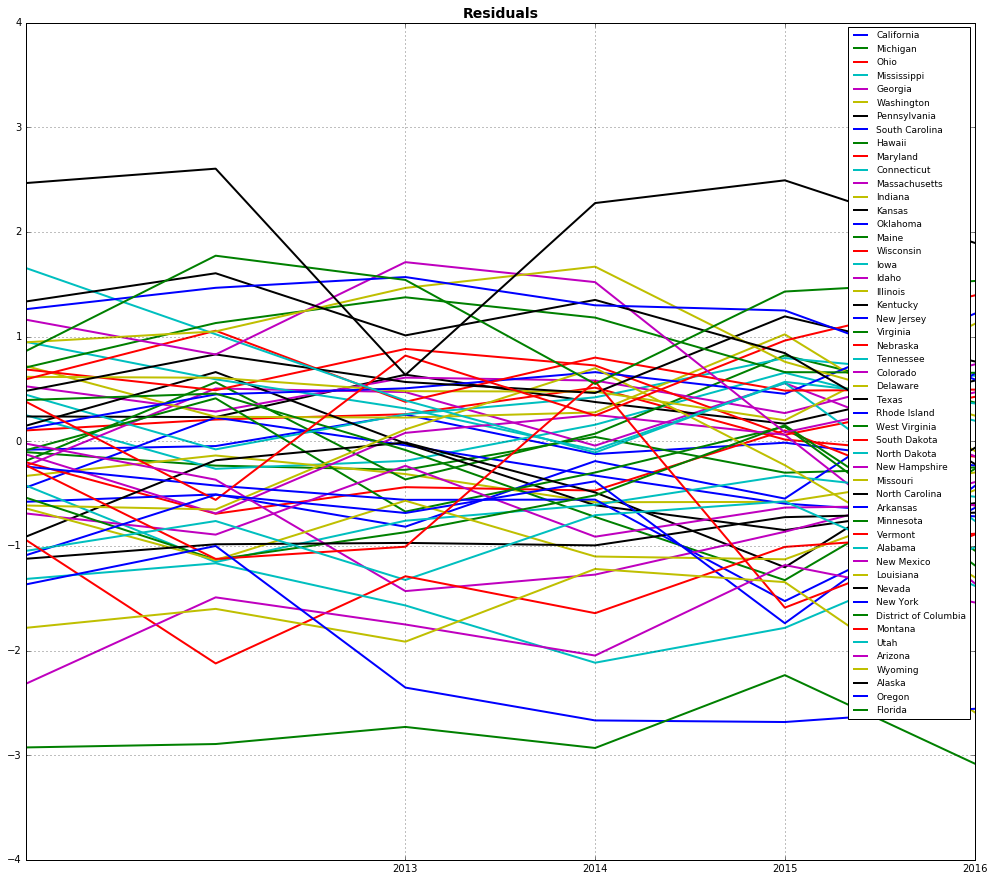

In [70]:
plt.figure(figsize=(17, 15))
plt.plot(e.iloc[:,:-1].T, linewidth = 2)
plt.title('Residuals',fontsize=14, fontweight='bold')
plt.legend(e.index, prop={'size': 9})
plt.xticks(years[2:],years[2:])
plt.ylim(-4,4)
plt.grid()
plt.show()

### Spatial cross-validation considering also health insurance coverage

In [71]:
# crude prevalence data
e = pd.DataFrame(index = years)
r2_model = []
MSE_model = []
columns = []
for state in states:
    print(state)
    s = set(states).difference([state])
    X_train = []
    y_train = []
    for ostate in s:
        x = []
        y_train += [GT.loc[ostate]]
        keywords = list(keywords)
        for kw in keywords:
            x += [GoogleTrends[kw].loc[ostate]]
        x += [P.loc[ostate]]
        x += [HIC.loc[ostate]]
        x = pd.concat(x, axis = 1)
    
        X_train += [pd.DataFrame(x.values, columns = keywords+['Poverty','Health Insurance'])]
        
    # TRAIN
    X_train = pd.concat(X_train, axis = 0)
    X_train = (X_train-X_train.mean())/X_train.std()
    
    y_train = pd.concat(y_train, axis = 0)
    #print(X_train.shape)
    #print(y_train.shape)
    
    # TEST  
    
    X_test = []
    for kw in keywords:
        X_test += [GoogleTrends[kw].loc[state]]
        
    X_test += [P.loc[state]]
    X_test += [HIC.loc[state]]
    X_test = pd.concat(X_test, axis = 1)
    X_test = pd.DataFrame(X_test.values, columns = keywords+['Poverty','Health Insurance'])
    X_test = (X_test-X_test.mean())/X_test.std()
    X_test = X_test.fillna(0)
    
    y_test = GT.loc[state]
    #print(X_test.shape)
    #print(y_test.shape)
    
    
    f,p = f_regression(X_train, y_train.values.ravel())
    cols = X_train.columns[p<10**(-6)]
    print('Features: ', *list(cols))
    columns += list(cols)
    
    model = lr_function(X_train[cols], X_test[cols], y_train, y_test)
    
    r2_model += [model[1]]
    MSE_model += [model[0]]
    e[state] = model[2]
    
    print('MSE',MSE_model[-1])
    print('r2',r2_model[-1])
    
print()
print('MSE',np.mean(MSE_model))
print('r2',np.mean(r2_model))
e = e.T
e['mean squared error'] = np.mean(e**2, axis = 1)
e = e.sort_values('mean squared error')
results5['by states'] = [np.mean(MSE_model), np.mean(r2_model)]

Alabama
Features:  Dermatology.1 Australia Carcinoma Skin cancer Dermatology Melanoma
MSE 5.25926670064
r2 -106.575909786
Alaska
Features:  Carcinoma Skin cancer Melanoma
MSE 9.5046697032
r2 -366.922698188
Arizona
Features:  Dermatology.1 Australia Carcinoma Skin cancer Dermatology Melanoma
MSE 3.76323961568
r2 -12.824145527
Arkansas
Features:  Dermatology.1 Australia Carcinoma Skin cancer Dermatology Melanoma
MSE 1.02398189446
r2 -3.1142129688
California
Features:  Dermatology.1 Australia Carcinoma Skin cancer Dermatology Melanoma
MSE 1.30867999485
r2 -12.6954883182
Colorado
Features:  Dermatology.1 Australia Carcinoma Skin cancer Dermatology Melanoma
MSE 0.39017454481
r2 -9.64112394938
Connecticut
Features:  Dermatology.1 Australia Carcinoma Skin cancer Dermatology Melanoma
MSE 0.55323028096
r2 -47.5763173526
Delaware
Features:  Dermatology.1 Australia Carcinoma Skin cancer Dermatology Melanoma
MSE 0.964246901497
r2 -8.83367944869
District of Columbia
Features:  Dermatology.1 Austral

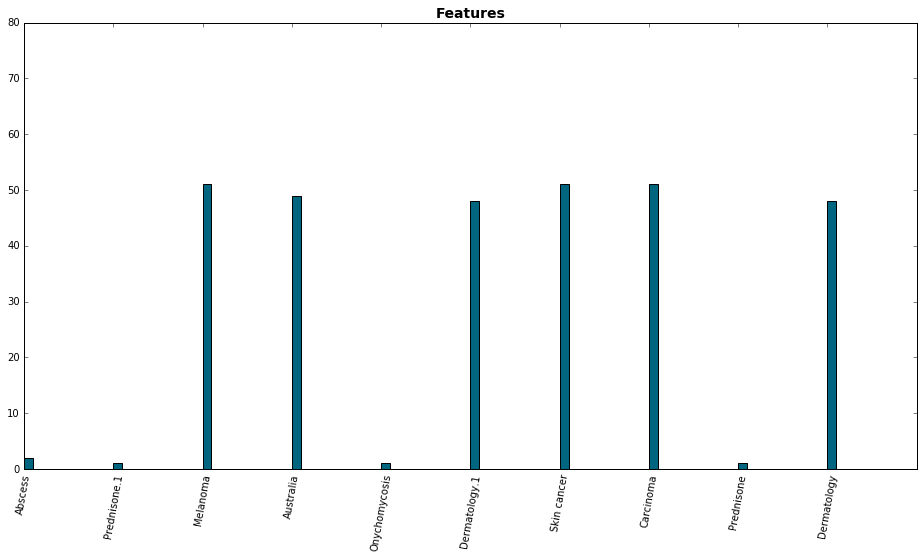

In [72]:
count = Counter(columns)
plt.figure(figsize=(16, 8))
plt.bar(np.arange(len(count)), count.values(), .1, color = nc)
plt.xticks(np.arange(len(count)),count.keys(), rotation=80)
plt.ylim(0,80)
plt.title('Features', fontsize=14, fontweight='bold')
plt.show()

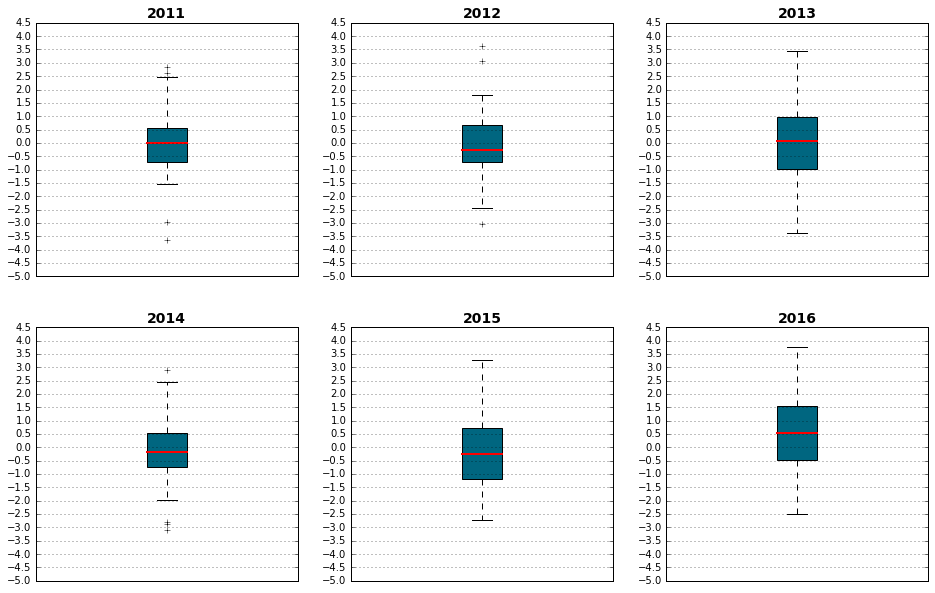

In [73]:
plt.figure(figsize=(16, 10))

for y in range(len(years)):
    plt.subplot(231+y)
    bp = plt.boxplot(e.T.loc[years[y],:], patch_artist = True)
    plt.setp(bp['boxes'], color='black')
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['medians'], color='red', linewidth = 2)
    plt.setp(bp['fliers'], color='black')
    plt.setp(bp['caps'], color='black')
    bp['boxes'][0].set_facecolor(nc)
    plt.title(str(years[y]), fontsize=14, fontweight='bold')
    plt.ylim(-3,3)
    plt.yticks(np.arange(-5,5,.5))
    plt.xticks([])
    plt.grid()
plt.show()

In [74]:
print("Best predicted states, linear regression with F-test considering Poverty Percentage and health insurance:")
print("")
e.head()

Best predicted states, linear regression with F-test considering Poverty Percentage and health insurance:



2011      2012      2013      2014      2015      2016  \
South Dakota -0.209030 -0.505944  0.060173 -0.647459  0.106596  0.075665   
Rhode Island -0.719343  0.292602 -0.154495 -0.136541 -0.453397 -0.560825   
Iowa          0.012636 -0.195653  0.206100 -0.477550 -0.306000  0.966467   
Oklahoma     -0.595131 -0.708064  0.385990  0.545949  0.705133  0.280124   
Ohio          0.123130 -0.348454  0.614406 -0.018690  0.323546  1.144062   

              mean squared error  
South Dakota            0.123264  
Rhode Island            0.194279  
Iowa                    0.222777  
Oklahoma                0.313044  
Ohio                    0.321331

In [75]:
print("Worst predicted states, linear regression with F-test considering Poverty Percentage nad health insurance:")
print("")
e.tail()

Worst predicted states, linear regression with F-test considering Poverty Percentage nad health insurance:



2011      2012      2013      2014      2015  \
Arizona              -1.519366 -1.737949 -2.310517 -2.857452 -1.597352   
Alabama              -2.965936 -2.447192 -2.333747 -1.911660 -1.806229   
Alaska                2.848792  3.071746  2.559202  2.880458  3.258404   
Florida              -3.641900 -3.026933 -3.381754 -3.094166 -2.719588   
District of Columbia  2.629824  3.613877  3.452287  2.457541  2.788040   

                          2016  mean squared error  
Arizona              -1.093365            3.763240  
Alabama              -2.099236            5.259267  
Alaska                3.743398            9.504670  
Florida              -2.493658            9.508396  
District of Columbia  3.726432            9.932222

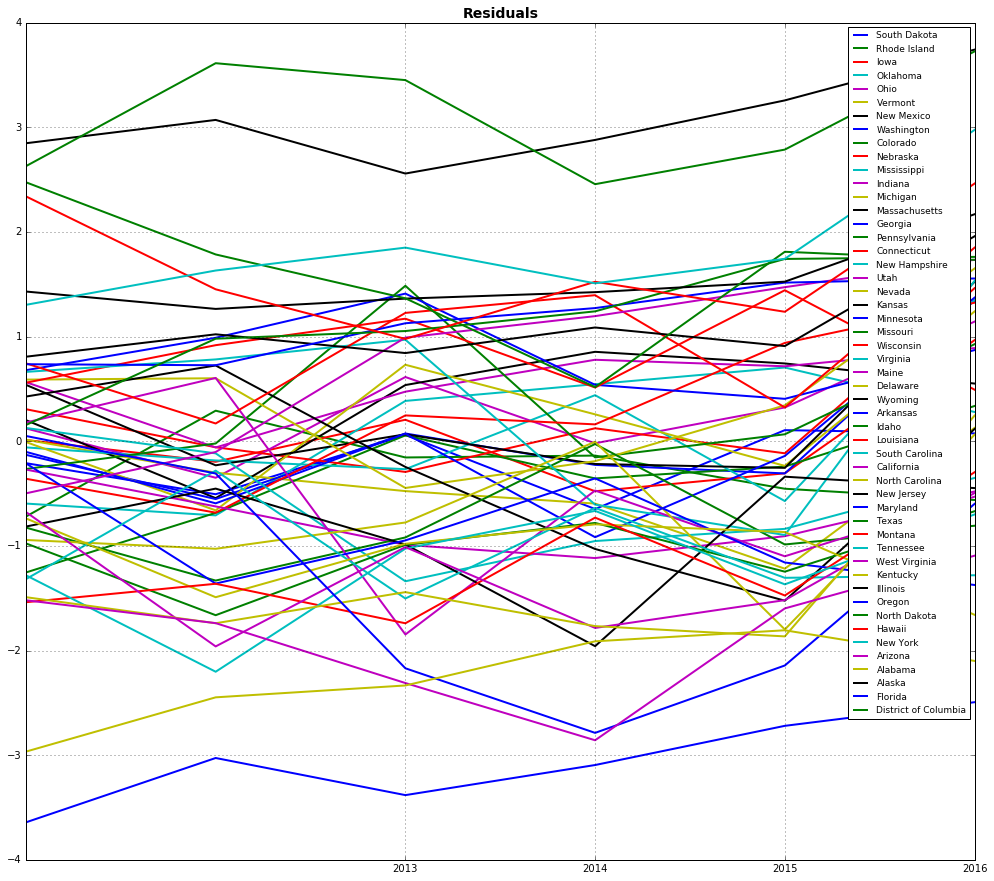

In [76]:
plt.figure(figsize=(17, 15))
plt.plot(e.iloc[:,:-1].T, linewidth = 2)
plt.title('Residuals',fontsize=14, fontweight='bold')
plt.legend(e.index, prop={'size': 9})
plt.xticks(years[2:],years[2:])
plt.ylim(-4,4)
plt.grid()
plt.show()

## AGE ADJUSTED

In [77]:
HIC2 = pd.DataFrame(index = states)
for y in years:
    df = pd.read_csv(path+'Insurance/HealthCareCoverage2_'+str(y)+'.csv')
    df = df.set_index('LocationDesc')
    HIC2[y] = df.loc[states,'Data_Value']
HIC2 = HIC2.fillna(HIC2.median())
#HIC

In [78]:
results6 = pd.DataFrame(index = ['MSE','R2'])

### temporal cross-validation considering Insurance Coverage

In [79]:
# age adjusted data
e = pd.DataFrame(index = states)
r2_model = []
MSE_model = []
columns = []
for year in range(len(years)):
    yys = set(range(len(years))).difference([year])
    X_train = []
    y_train = []
    for yy in yys:
        x = []
        for kw in keywords2:
            x += [GoogleTrends2[kw].loc[states,years[yy]]]
        x += [pd.DataFrame(P.loc[states,years[yy]].values, columns = ['Poverty'], index = states)]
        x += [pd.DataFrame(HIC2.loc[states,years[yy]].values, columns = ['Health Insurance'], index = states)]
        x = pd.concat(x, axis = 1)
        X_train += [pd.DataFrame(x.values, columns = keywords2+['Poverty', 'Health Insurance'], index = states)]
        
        y_train += [GT2.loc[states,str(years[yy])]]
        
    
    # TRAIN
    X_train = pd.concat(X_train, axis = 0)
    X_train = (X_train-X_train.mean())/X_train.std()
    y_train = pd.concat(y_train, axis = 0)
    #print(X_train.shape)
    #print(y_train.shape)
    
    # TEST
    
    x = []
    for kw in keywords2:
        x += [GoogleTrends2[kw].loc[states,years[year]]]
    
    x += [pd.DataFrame(P.loc[states,years[year]].values, columns = ['Poverty'], index = states)]
    x += [pd.DataFrame(HIC2.loc[states,years[year]].values, columns = ['Health Insurance'], index = states)]
    x = pd.concat(x, axis = 1)
    
    X_test = pd.DataFrame(x.values, columns = keywords2+['Poverty', 'Health Insurance'], index = states)
    X_test = (X_test-X_test.mean())/X_test.std()
    
    
    y_test = GT2.loc[states,str(years[yy])]
    #print(X_test.shape)
    #print(y_test.shape)
    #print(X_train.iloc[:5,:5])
    
    f,p = f_regression(X_train, y_train.values.ravel())
    cols = X_train.columns[p<10**(-2)]
    print('Features: ', *list(cols))
    columns += list(cols)
    
    model = lr_function(X_train[cols], X_test[cols], y_train, y_test)
    
    r2_model += [model[1]]
    MSE_model += [model[0]]
    e[str(years[year])] = model[2]
    
    print(years[year])
    print('MSE',MSE_model[-1])
    print('r2',r2_model[-1])
    
print()
print('MSE',np.mean(MSE_model))
print('r2',np.mean(r2_model))
e['mean squared error'] = np.mean(e**2, axis = 1)
e = e.sort_values('mean squared error')
results6['by years'] = [np.mean(MSE_model), np.mean(r2_model)]

Features:  Latin America Skin cancer Dermatology Abscess Melanoma Australia Food and Drug Administration Carcinoma Poverty Health Insurance
2011
MSE 0.633140609406
r2 0.364263650482
Features:  Latin America Skin cancer Dermatology Abscess Melanoma Australia Food and Drug Administration Carcinoma Health Insurance
2012
MSE 0.66619243708
r2 0.331076317434
Features:  Latin America Skin cancer Dermatology Abscess Melanoma Australia Food and Drug Administration Carcinoma Poverty Health Insurance
2013
MSE 0.668260241812
r2 0.329000035148
Features:  Latin America Skin cancer Dermatology Abscess Melanoma Australia Food and Drug Administration Carcinoma Poverty Health Insurance
2014
MSE 0.775319435616
r2 0.221501921712
Features:  Latin America Skin cancer Dermatology Abscess Melanoma Australia Food and Drug Administration Carcinoma Poverty Health Insurance
2015
MSE 0.622824680366
r2 0.374621872608
Features:  Latin America Skin cancer Dermatology Abscess Melanoma Australia Food and Drug Administr

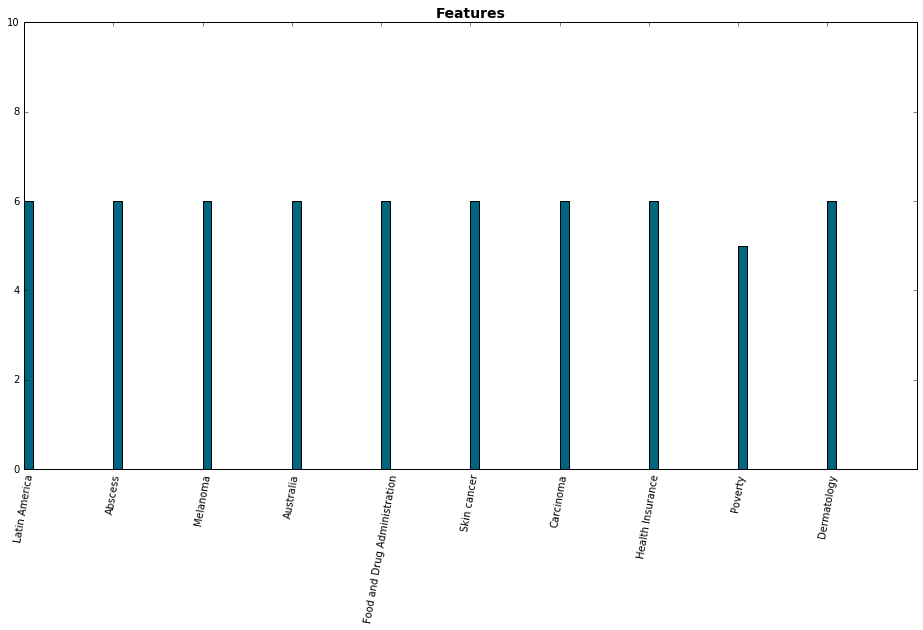

In [80]:
count = Counter(columns)
plt.figure(figsize=(16, 8))
plt.bar(np.arange(len(count)), count.values(), .1, color = nc)
plt.xticks(np.arange(len(count)),count.keys(), rotation=80)
plt.ylim(0,10)
plt.title('Features', fontsize=14, fontweight='bold')
plt.show()

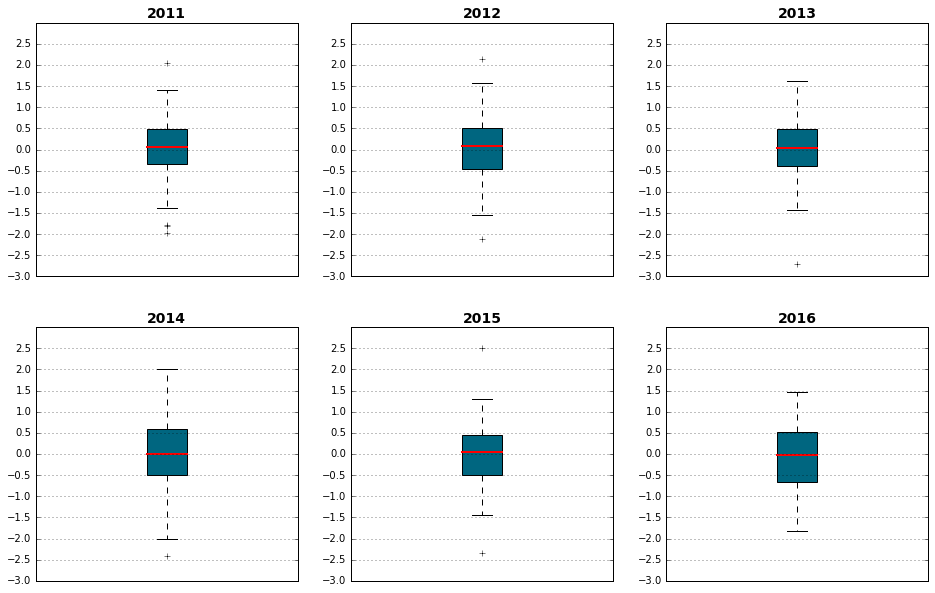

In [81]:
plt.figure(figsize=(16, 10))

for y in range(len(years)):
    
    plt.subplot(231+y)
    bp = plt.boxplot(e.loc[:,str(years[y])], patch_artist = True)
    plt.setp(bp['boxes'], color='black')
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['medians'], color='red', linewidth = 2)
    plt.setp(bp['fliers'], color='black')
    plt.setp(bp['caps'], color='black')
    bp['boxes'][0].set_facecolor(nc)
    plt.title(str(years[y]), fontsize=14, fontweight='bold')
    plt.ylim(-3,3)
    plt.yticks(np.arange(-3,3,.5))
    plt.xticks([])
    plt.grid()
plt.show()

In [82]:
print("Best predicted states, linear regression with F-test considering Poverty Percentage:")
print("")
e.head()

Best predicted states, linear regression with F-test considering Poverty Percentage:



2011      2012      2013      2014      2015      2016  \
Michigan       -0.176862  0.198751  0.086644  0.089488  0.151774 -0.031087   
Massachusetts   0.084761 -0.089845 -0.204328 -0.105233  0.064039  0.238581   
North Carolina -0.283706  0.043401  0.088337 -0.231419 -0.055645 -0.027726   
Washington      0.026218  0.050621  0.343868 -0.150067 -0.083199 -0.415321   
California     -0.097007  0.143045 -0.137972 -0.066135 -0.116239 -0.597303   

                mean squared error  
Michigan                  0.018383  
Massachusetts             0.021517  
North Carolina            0.024599  
Washington                0.053905  
California                0.070594

In [83]:
print("Worst predicted states, linear regression with F-test considering Poverty Percentage:")
print("")
e.tail()

Worst predicted states, linear regression with F-test considering Poverty Percentage:



2011      2012      2013      2014      2015      2016  \
Oregon    -0.470387 -0.544969 -1.427962 -2.005621 -1.441986 -1.830586   
Louisiana  1.342630  1.544205  1.617630  1.814673  1.293532  0.514775   
Nevada     1.408007  2.153662  1.607322  1.799447  1.108502  0.258069   
Alaska     2.040611  1.572914  1.582424  2.019333  2.514727  1.290796   
Utah      -1.974873 -2.102732 -2.698463 -2.417767 -2.351929 -1.815922   

           mean squared error  
Oregon               2.001703  
Louisiana            2.005868  
Nevada               2.289602  
Alaska               3.534988  
Utah                 5.046342

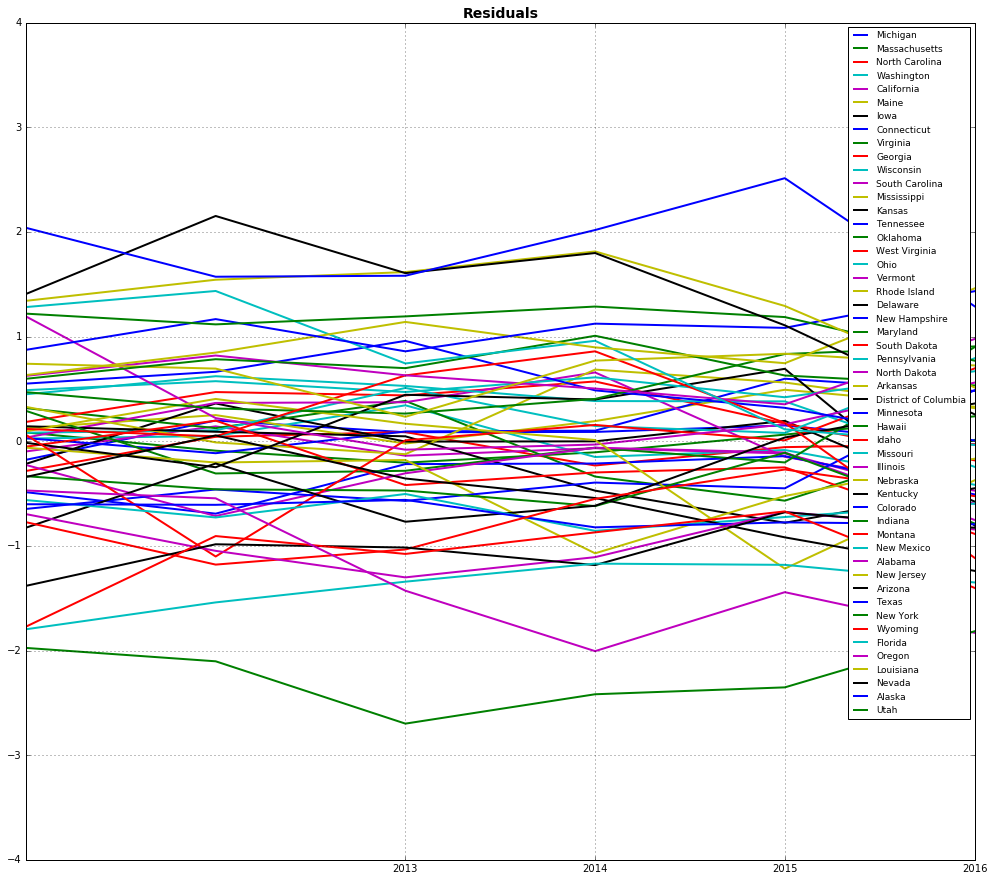

In [84]:
plt.figure(figsize=(17, 15))
plt.plot(e.iloc[:,:-1].T, linewidth = 2)
plt.title('Residuals',fontsize=14, fontweight='bold')
plt.legend(e.index, prop={'size': 9})
plt.xticks(years[2:],years[2:])
plt.ylim(-4,4)
plt.grid()
plt.show()

### Spatial cross-validation

In [85]:
# age adjusted data

e = pd.DataFrame(index = years)
r2_model = []
MSE_model = []
columns = []

for state in states:
    
    print(state)
    s = set(states).difference([state])
    X_train = []
    y_train = []
    
    for ostate in s:
        
        x = []
        y_train += [GT2.loc[ostate]]
        for kw in keywords2:
            
            x += [GoogleTrends2[kw].loc[ostate]]
        x += [P.loc[ostate]]
        x += [HIC2.loc[ostate]]
        x = pd.concat(x, axis = 1)
    
        X_train += [pd.DataFrame(x.values, columns = keywords2+['Poverty','Health Insurance'])]
        
    # TRAIN
    X_train = pd.concat(X_train, axis = 0)
    X_train = (X_train-X_train.mean())/X_train.std()
    
    y_train = pd.concat(y_train, axis = 0)
    #print(X_train.shape)
    #print(y_train.shape)
    
    # TEST  
    
    X_test = []
    for kw in keywords2:
        X_test += [GoogleTrends2[kw].loc[state]]
        
    X_test += [P.loc[state]]
    X_test += [HIC2.loc[state]]
    X_test = pd.concat(X_test, axis = 1)
    X_test = pd.DataFrame(X_test.values, columns = keywords2+['Poverty','Health Insurance'])
    X_test = (X_test-X_test.mean())/X_test.std()
    X_test = X_test.fillna(0)
    
    y_test = GT2.loc[state]
    #print(X_test.shape)
    #print(y_test.shape)
    
    
    f,p = f_regression(X_train, y_train.values.ravel())
    cols = X_train.columns[p<10**(-6)]
    print('Features: ', *list(cols))
    columns += list(cols)
    
    model = lr_function(X_train[cols], X_test[cols], y_train, y_test)
    
    r2_model += [model[1]]
    MSE_model += [model[0]]
    e[state] = model[2]
    
    print('MSE',MSE_model[-1])
    print('r2',r2_model[-1])
    
print()
print('MSE',np.mean(MSE_model))
print('r2',np.mean(r2_model))
e = e.T
e['mean squared error'] = np.mean(e**2, axis = 1)
e = e.sort_values('mean squared error')
results6['by states'] = [np.mean(MSE_model), np.mean(r2_model)]

Alabama
Features:  Health Insurance
MSE 3.8477070324
r2 -64.0316681532
Alaska
Features:  Latin America Health Insurance
MSE 5.15018652203
r2 -120.180859342
Arizona
Features:  Skin cancer Health Insurance
MSE 2.90286627885
r2 -27.3976049018
Arkansas
Features:  Health Insurance
MSE 0.648169110008
r2 -2.9955630069
California
Features:  Skin cancer Health Insurance
MSE 0.304053524018
r2 -1.90342887656
Colorado
Features:  Skin cancer Health Insurance
MSE 0.820250982355
r2 -66.1114440108
Connecticut
Features:  Skin cancer Dermatology Health Insurance
MSE 0.294287286566
r2 -10.9037554117
Delaware
Features:  Skin cancer Health Insurance
MSE 0.379567538335
r2 -2.97221842444
District of Columbia
Features:  Dermatology
MSE 5.36951187947
r2 -22.4590324831
Florida
Features:  Latin America Skin cancer
MSE 3.61941417073
r2 -66.8640157011
Georgia
Features:  Skin cancer Health Insurance
MSE 0.416232151619
r2 -6.0680931407
Hawaii
Features:  Skin cancer
MSE 2.52494601579
r2 -44.4490282842
Idaho
Features:

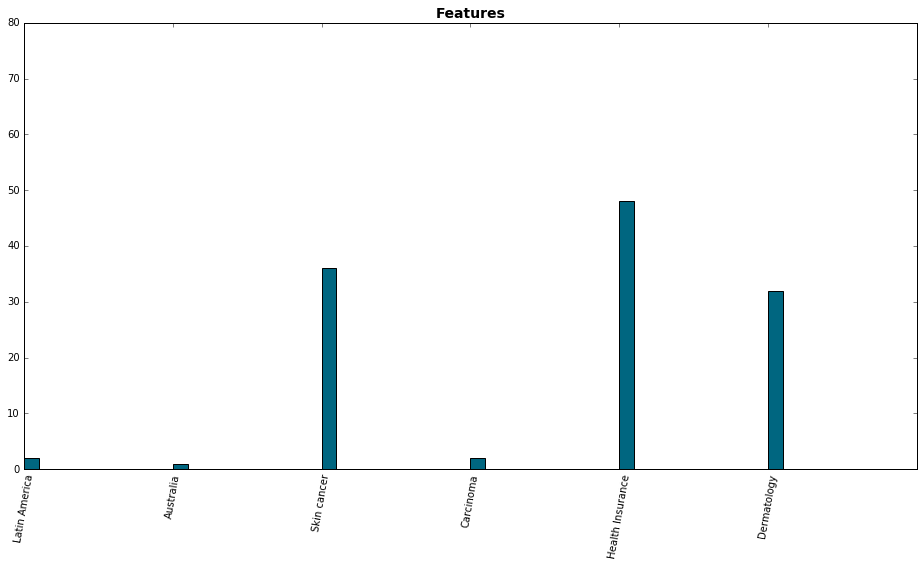

In [86]:
count = Counter(columns)
plt.figure(figsize=(16, 8))
plt.bar(np.arange(len(count)), count.values(), .1, color = nc)
plt.xticks(np.arange(len(count)),count.keys(), rotation=80)
plt.ylim(0,80)
plt.title('Features', fontsize=14, fontweight='bold')
plt.show()

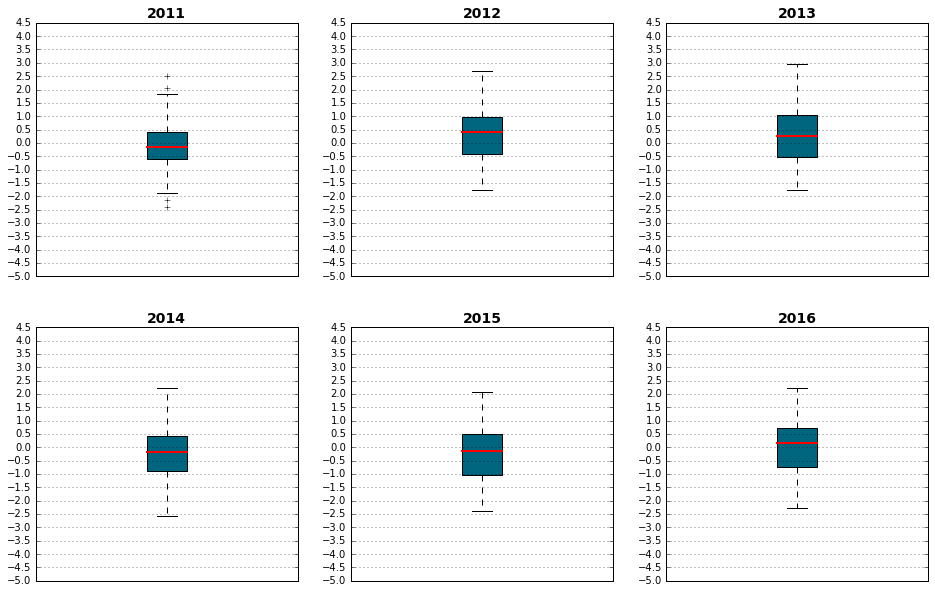

In [87]:
plt.figure(figsize=(16, 10))

for y in range(len(years)):
    plt.subplot(231+y)
    bp = plt.boxplot(e.T.loc[years[y],:], patch_artist = True)
    plt.setp(bp['boxes'], color='black')
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['medians'], color='red', linewidth = 2)
    plt.setp(bp['fliers'], color='black')
    plt.setp(bp['caps'], color='black')
    bp['boxes'][0].set_facecolor(nc)
    plt.title(str(years[y]), fontsize=14, fontweight='bold')
    plt.ylim(-3,3)
    plt.yticks(np.arange(-5,5,.5))
    plt.xticks([])
    plt.grid()
plt.show()

In [88]:
print("Best predicted states, linear regression with F-test considering Poverty Percentage and Health Insurance:")
print("")
e.head()

Best predicted states, linear regression with F-test considering Poverty Percentage and Health Insurance:



2011      2012      2013      2014      2015      2016  \
Mississippi   -0.060021  0.249748 -0.175373  0.002158 -0.128287  0.271775   
Washington    -0.565417 -0.155904  0.196600 -0.264561 -0.091910  0.225192   
South Dakota   0.526221  0.020931  0.043924 -0.341157  0.114972 -0.510892   
New Hampshire -0.520507  0.104692 -0.514377 -0.060358 -0.312147 -0.475303   
Oklahoma      -0.167179  0.028150  0.491736 -0.133368  0.754135 -0.405473   

               mean squared error  
Mississippi              0.031176  
Washington               0.085301  
South Dakota             0.111649  
New Hampshire            0.145577  
Oklahoma                 0.170243

In [89]:
print("Worst predicted states, linear regression with F-test considering Poverty Percentage and Health Insurance:")
print("")
e.tail()

Worst predicted states, linear regression with F-test considering Poverty Percentage and Health Insurance:



2011      2012      2013      2014      2015  \
Florida              -2.407756 -1.756805 -1.654947 -1.570566 -1.688312   
Alabama              -2.139356 -1.226696 -1.711049 -2.169515 -2.051450   
Utah                 -1.892183 -1.499522 -1.757309 -2.464923 -2.372189   
Alaska                2.495996  2.376016  2.644086  2.025348  2.061131   
District of Columbia  2.068113  2.676077  2.943919  2.220028  1.484040   

                          2016  mean squared error  
Florida              -2.185613            3.619414  
Alabama              -2.271934            3.847707  
Utah                 -1.991873            4.097958  
Alaska                1.919423            5.150187  
District of Columbia  2.231823            5.369512

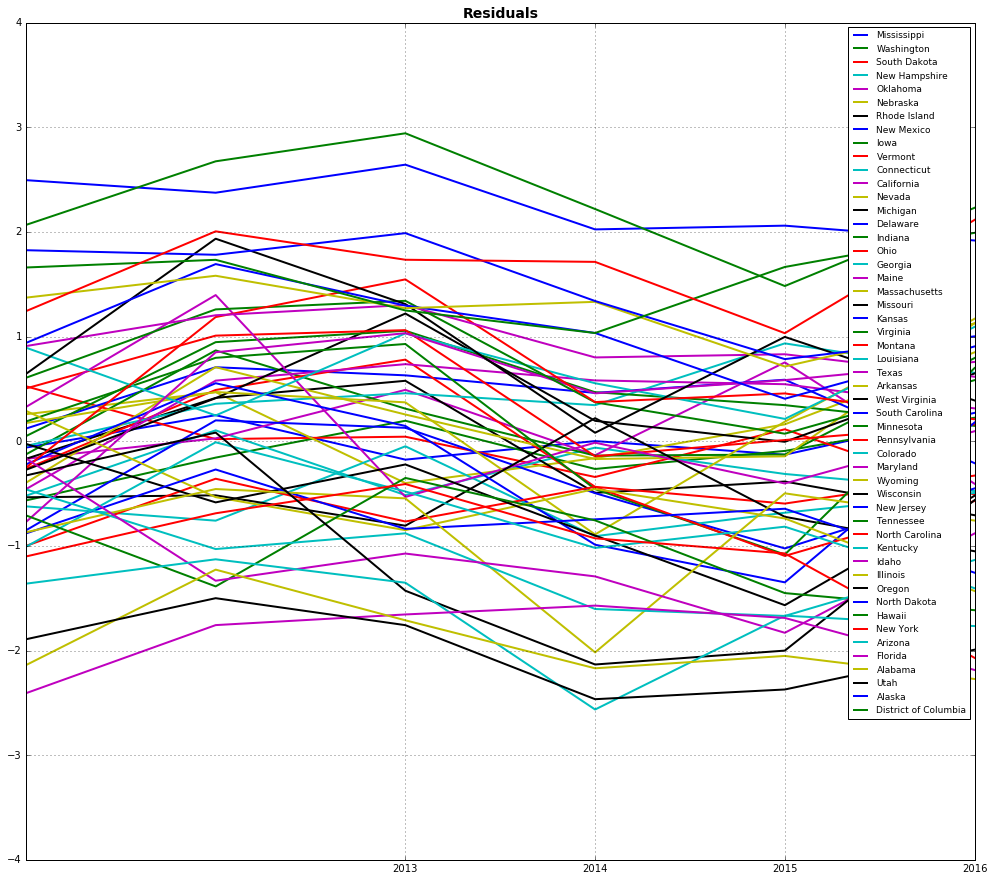

In [90]:
plt.figure(figsize=(17, 15))
plt.plot(e.iloc[:,:-1].T, linewidth = 2)
plt.title('Residuals',fontsize=14, fontweight='bold')
plt.legend(e.index, prop={'size': 9})
plt.xticks(years[2:],years[2:])
plt.ylim(-4,4)
plt.grid()
plt.show()

In [91]:
Rs = [results5, results6]
names = ['Crude Prevalence','Age Adjusted']
header = [[names[0]]*2+[names[1]]*2,list(results.columns)+list(results2.columns)]
d = pd.DataFrame(pd.concat(Rs, axis=1).values, columns = header, index = results.index)
d

Crude Prevalence            Age Adjusted           
            by years  by states     by years  by states
MSE         1.038628   1.718551     0.669444   1.159320
R2          0.331406 -24.218245     0.321426 -18.094151

#### Adding two variables ( poverty percentage and health insurance coverage) the best result has been obtained for age adjusted values prediction, using a temporal cross validation.

#### All the regression models we setted up above have been trained just considering data from queries as requested in the assigment description.

## Alternative model

In [92]:
results7 = pd.DataFrame(index = ['MSE','R2']) #save results 

In [93]:
#crude prevalence data 
r2_model = []
MSE_model = []
columns =  []
e = pd.DataFrame(index = states)

for year in range(2,len(years)):
    
    # TRAIN
    X = []
    
    x = []
    for kw in keywords:
        x += [GoogleTrends[kw].loc[states,years[year-1]]] # query anno precedente
    x += [pd.DataFrame(P.loc[states,years[year-1]].values, columns = ['Poverty'], index = states)]
    x += [pd.DataFrame(HIC.loc[states,years[year-1]].values, columns = ['Health Insurance'], index = states)]
    x = pd.concat(x, axis = 1)
    X += [pd.DataFrame(x.values, columns = keywords+['Poverty','Health Insurance'], index = states)]
    


    x = pd.DataFrame(GT.loc[states,str(years[year-2])].values, columns = ['Yt-1'], index = states) # y anno precedente
    X += [x]
    
    X = pd.concat(X, axis = 1)
    Y = GT.loc[states,str(years[year-1])]
    
    #
    X_train = (X-X.mean())/X.std()
    y_train = Y
     
    # TEST
    X = []
    x = []
    for kw in keywords:
        x += [GoogleTrends[kw].loc[states,years[year]]] # query anno vero
    x += [pd.DataFrame(P.loc[states,years[year]].values, columns = ['Poverty'], index = states)]
    x += [pd.DataFrame(HIC.loc[states,years[year]].values, columns = ['Health Insurance'], index = states)]
    x = pd.concat(x, axis = 1)
    X += [pd.DataFrame(x.values, columns = keywords+['Poverty','Health Insurance'], index = states)]
    

    x = pd.DataFrame(GT.loc[states,str(years[year-1])].values, columns = ['Yt-1'], index = states) # anno precedente
    X += [x]
    
    X = pd.concat(X, axis = 1)
    
    #
    X_test = (X-X.mean())/X.std()
    y_test = GT.loc[states,str(years[year])]
    
    f,p = f_regression(X_train, y_train.values.ravel())
    cols = X_train.columns[p<10**(-5)]
    print('Features: ', *list(cols))
    columns += list(cols)
    
    model = lr_function(X_train[cols], X_test[cols], y_train, y_test)
    
    r2_model += [model[1]]
    MSE_model += [model[0]]
    e[str(years[year])] = model[2]
    
    print(years[year])
    print('MSE',MSE_model[-1])
    print('r2',r2_model[-1])
    
print()
print('MSE',np.mean(MSE_model))
print('r2',np.mean(r2_model))
e['mean squared error'] = np.mean(e**2, axis = 1)
e = e.sort_values('mean squared error')
results7['with past'] = [np.mean(MSE_model), np.mean(r2_model)]

Features:  Yt-1
2013
MSE 0.284101257409
r2 0.810380454062
Features:  Yt-1
2014
MSE 0.15775062032
r2 0.891169821215
Features:  Yt-1
2015
MSE 0.150426720028
r2 0.900310869651
Features:  Yt-1
2016
MSE 0.213384955585
r2 0.863477886575

MSE 0.201415888336
r2 0.866334757876


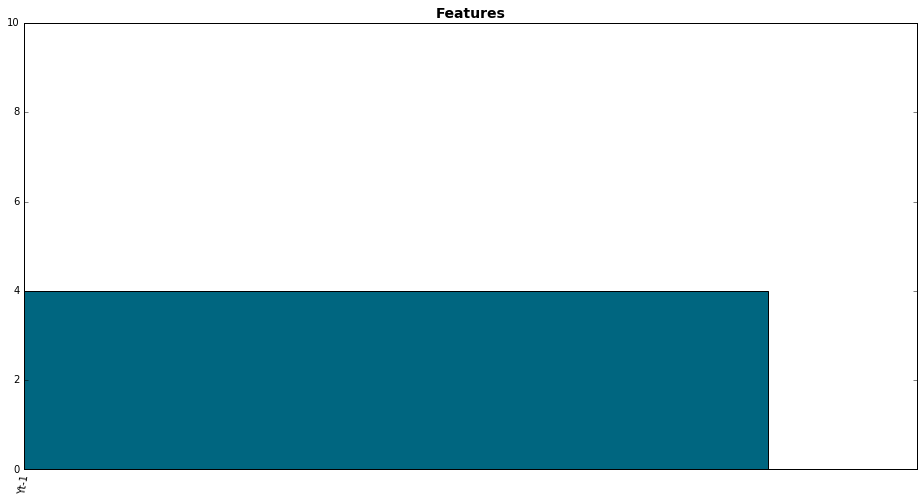

In [94]:
count = Counter(columns)
plt.figure(figsize=(16, 8))
plt.bar(np.arange(len(count)), count.values(), .1, color = nc)
plt.xticks(np.arange(len(count)),count.keys(), rotation=80)
plt.ylim(0,10)
plt.title('Features', fontsize=14, fontweight='bold')
plt.show()

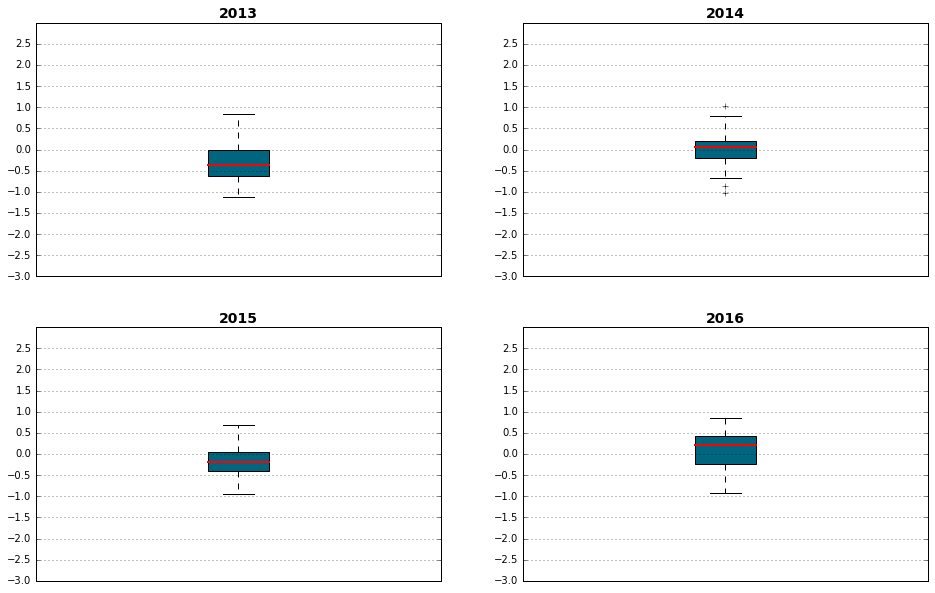

In [95]:
plt.figure(figsize=(16, 10))

for y in range(len(years[:-2])):
    plt.subplot(221+y)
    bp = plt.boxplot(e.loc[:,str(years[y+2])], patch_artist = True)
    plt.setp(bp['boxes'], color='black')
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['medians'], color='red', linewidth = 2)
    plt.setp(bp['fliers'], color='black')
    plt.setp(bp['caps'], color='black')
    bp['boxes'][0].set_facecolor(nc)
    plt.title(str(years[y+2]), fontsize=14, fontweight='bold')
    plt.ylim(-3,3)
    plt.yticks(np.arange(-3,3,.5))
    plt.xticks([])
    plt.grid()
plt.show()

In [96]:
print("Best predicted states, linear regression with F-test:")
print("")
e.head()

Best predicted states, linear regression with F-test:



2013      2014      2015      2016  mean squared error
North Dakota  0.113634  0.009780 -0.010043 -0.131111            0.007575
Connecticut  -0.191004  0.014238  0.111724  0.219521            0.024339
Indiana      -0.050759 -0.347545  0.022900  0.123635            0.034794
Virginia     -0.174906  0.126977 -0.171512  0.319521            0.044556
Maryland     -0.394415  0.071563 -0.037983 -0.151681            0.046284

In [97]:
print("Worst predicted states, linear regression with F-test:")
print("")
e.tail()

Worst predicted states, linear regression with F-test:



2013      2014      2015      2016  mean squared error
Maine         -0.991004 -0.336718 -0.349745  0.557811            0.382236
Wisconsin     -1.078317 -0.060284  0.528488 -0.451681            0.412429
New Hampshire -1.123200  0.731434 -0.416216 -0.321619            0.518312
Nevada        -1.042710 -0.204871  0.683784  0.823635            0.568788
Missouri      -0.663446  1.031434 -0.799452 -0.725733            0.667457

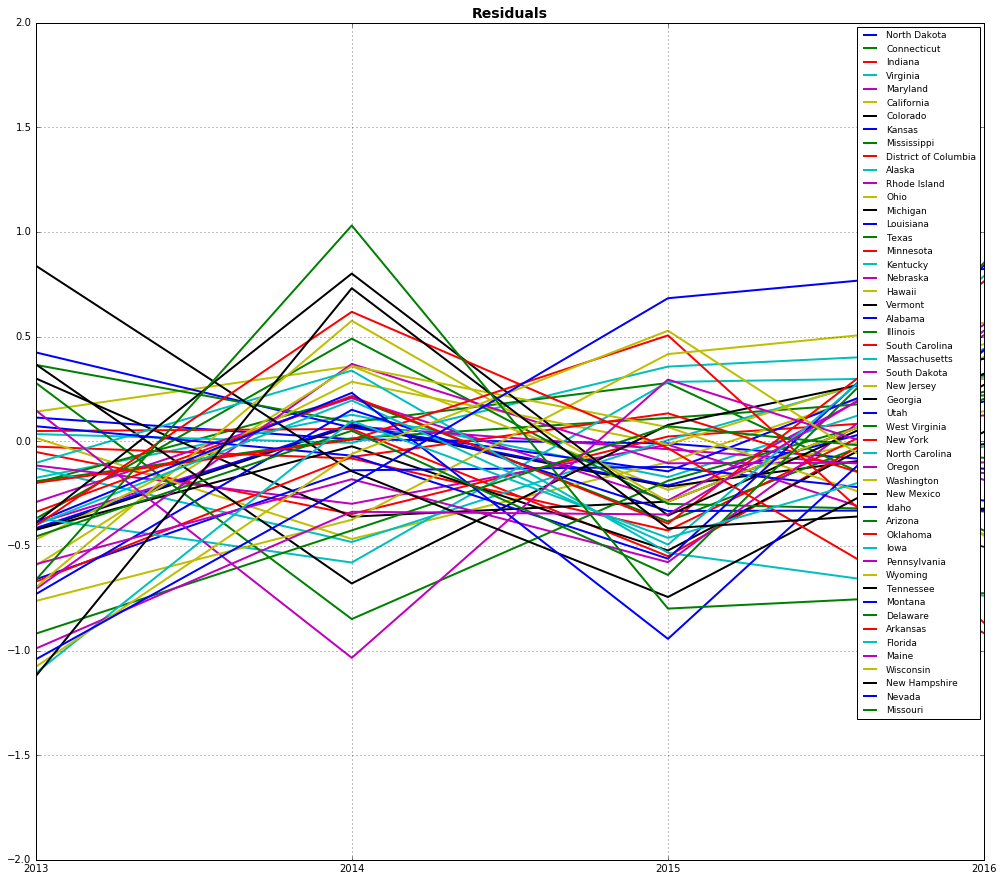

In [98]:
plt.figure(figsize=(17, 15))
plt.plot(e.iloc[:,:-1].T, linewidth = 2)
plt.title('Residuals',fontsize=14, fontweight='bold')
plt.legend(e.index, prop={'size': 9})
plt.xticks(years[2:],years[2:])
plt.ylim(-2,2)
plt.grid()
plt.show()

In [99]:
results7 #result for alternative model

with past
MSE   0.201416
R2    0.866335

In [100]:
Rs = [results, results2,results3,results4,results5,results6,results7]
names = ['Crude Prevalence','Age Adjusted']
header = [['2.1']*4+['2.2']*4+['2.3']*4+['Alternative']*1,
          [names[0]]*2+[names[1]]*2+[names[0]]*2+[names[1]]*2+[names[0]]*2+[names[1]]*2+[names[0]],
          list(results.columns)*6+list(results7.columns)]
d = pd.DataFrame(pd.concat(Rs, axis=1).values, columns = header, index = results.index)
d

2.1                                                 2.2  \
    Crude Prevalence            Age Adjusted            Crude Prevalence   
            by years  by states     by years  by states         by years   
MSE         1.025298   1.718551     0.709187   1.149505         1.049709   
R2          0.287834 -24.218245     0.285089 -17.963102         0.324316   

                                                    2.3             \
               Age Adjusted            Crude Prevalence              
     by states     by years  by states         by years  by states   
MSE   1.718551     0.746328   1.149505         1.038628   1.718551   
R2  -24.218245     0.243275 -17.963102         0.331406 -24.218245   

                                 Alternative  
    Age Adjusted            Crude Prevalence  
        by years  by states        with past  
MSE     0.669444   1.159320         0.201416  
R2      0.321426 -18.094151         0.866335

####  Age adjusted data as target had better results, considering temporal cross-validation in particular. Health insurance coverage and poverty percentage data slightly  improved the results in terms of mse and R2 but the only way to obtain good predictions was to  consider GT in the train: we setted up an alternative model, taking all features described above and the GT data of the previous year. 

#### We performed the regression with F-test as before but we noticed that the only feature used to train the model was GT related to the previous year. This result could be expected since our queries and poverty/insurance features were not high correlated with the target. However we couldn't perform a real times series model since we have only six years of information.
